<a href="https://colab.research.google.com/github/fpivatti/DS-Notebooks/blob/master/Flavio_Pivatti_TCC_DS_USP_ESALQ_V4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Projeto Conclusão Curso Data Science & Analytics USP/ESALQ
**Aluno:** Flávio Pivatti
  **Turma:** 212
  **Orientador:** Renato Máximo Sátiro

# Crescimento da Geração Distribuída de Energia Solar Fotovoltaica no Brasil: Uma Análise Descritiva, Temporal e Preditiva

In [ ]:
# Montando o drive(pasta do google drive que contem a base de dados)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Dicionário de dados e datset da geração distribuída da ANEEL
import webbrowser
url = 'https://dadosabertos.aneel.gov.br/dataset/relacao-de-empreendimentos-de-geracao-distribuida'
webbrowser.open_new_tab(url)

True

## Data Wrangling / Data Cleaning

In [ ]:
# Bibliotecas utilizadas no projeto:
# Pandas é uma Bibliotecas para análise e manipulação de dados
import pandas as pd
from pandas import Grouper
from pandas import DataFrame
# Numpy é uma biblioteca para operações matemáticas de álgebra linear e análise de dados
import numpy as np
# Biblitoteca para calculos estatísticos
from scipy import stats
# Bibliotecas para visualização dos dados
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

In [ ]:
# Criando um data frame

"""Pandas DataFrame é uma estrutura de dados bidimensional com os dados alinhados de forma tabular em linhas e colunas,
mutável em tamanho e potencialmente heterogênea, semelhantemente a uma pasta de trabalho do MS-EXCEL."""

df_energia_solar = pd.read_csv(
    '/content/drive/My Drive/TCC USP/empreendimento-geracao-distribuida-agosto23.csv', sep=';', encoding='ISO-8859-1', low_memory=False)

# Parâmetro sep=';', especifica o ";" como delimitador separador das colunas
# Parâmetro encoding='ISO-8859-1', para tratar os caratcteres especiais
# Parâmetro low_memory=False, para evitar o warning de uso de memória

In [ ]:
# Explorando o data frame. Total de linhas e colunas
df_energia_solar.shape

(2071162, 33)

In [ ]:
# Explorando o data frame. Tipo de dados
df_energia_solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071162 entries, 0 to 2071161
Data columns (total 33 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   DatGeracaoConjuntoDados       object 
 1   AnmPeriodoReferencia          object 
 2   NumCNPJDistribuidora          float64
 3   SigAgente                     object 
 4   NomAgente                     object 
 5   CodClasseConsumo              int64  
 6   DscClasseConsumo              object 
 7   CodSubGrupoTarifario          int64  
 8   DscSubGrupoTarifario          object 
 9   codUFibge                     float64
 10  SigUF                         object 
 11  codRegiao                     float64
 12  NomRegiao                     object 
 13  CodMunicipioIbge              float64
 14  NomMunicipio                  object 
 15  CodCEP                        object 
 16  SigTipoConsumidor             object 
 17  NumCPFCNPJ                    object 
 18  NomeTitularEmpreendime

In [ ]:
# Explorando o data frame. Mostrando as cinco primeiras linhas
df_energia_solar.head(3)

,DatGeracaoConjuntoDados,AnmPeriodoReferencia,NumCNPJDistribuidora,SigAgente,NomAgente,CodClasseConsumo,DscClasseConsumo,CodSubGrupoTarifario,DscSubGrupoTarifario,codUFibge,SigUF,codRegiao,NomRegiao,CodMunicipioIbge,NomMunicipio,CodCEP,SigTipoConsumidor,NumCPFCNPJ,NomeTitularEmpreendimento,CodEmpreendimento,DthAtualizaCadastralEmpreend,SigModalidadeEmpreendimento,DscModalidadeHabilitado,QtdUCRecebeCredito,SigTipoGeracao,DscFonteGeracao,DscPorte,MdaPotenciaInstaladaKW,NumCoordNEmpreendimento,NumCoordEEmpreendimento,NomSubEstacao,NumCoordESub,NumCoordNSub
0,2023-08-14,08/2023,3.305020e+13,CPFL-PAULISTA,COMPANHIA PAULISTA DE FORÇA E LUZ,1,Residencial,9,B1,35.0,SP,3501.0,Sudeste,3533007.0,Nova Granada,15440***,PF,***.497.808-**,***,NaN,2023-01-23,P,Com Microgeracao ou Minigeracao distribuida,1,UFV,Radiação solar,Microgeracao,"3,30",NaN,NaN,NaN,NaN,NaN
1,2023-08-14,08/2023,4.065033e+12,ELETROACRE,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,2,Comercial,11,B3,12.0,AC,1202.0,Norte,1200401.0,Rio Branco,69912452,PJ,12005360000165,ELITE ENGENHARIA LTDA,GD.AC.000.000.590,2015-07-15,P,Com Microgeracao ou Minigeracao distribuida,1,UFV,Radiação solar,Microgeracao,"32,50","-67,85","-9,96",NaN,NaN,NaN
2,2023-08-14,08/2023,4.065033e+12,ELETROACRE,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,1,Residencial,9,B1,12.0,AC,1201.0,Norte,1200609.0,Tarauacá,69970***,PF,***.582.542-**,***,GD.AC.000.000.591,2015-04-20,P,Com Microgeracao ou Minigeracao distribuida,1,UFV,Radiação solar,Microgeracao,"4,00","-70,78","-8,15",NaN,NaN,NaN


In [ ]:
# Ajustando pra mostrar todas as colunas
pd.set_option('display.max.columns',  None)

In [ ]:
# Retirando a precisão de seis casas decimais
#pd.set_option('display.precision', 3)

In [ ]:
# Explorando o data frame. Mostrando as 3 primeiras linhas
df_energia_solar.head(3)

,DatGeracaoConjuntoDados,AnmPeriodoReferencia,NumCNPJDistribuidora,SigAgente,NomAgente,CodClasseConsumo,DscClasseConsumo,CodSubGrupoTarifario,DscSubGrupoTarifario,codUFibge,SigUF,codRegiao,NomRegiao,CodMunicipioIbge,NomMunicipio,CodCEP,SigTipoConsumidor,NumCPFCNPJ,NomeTitularEmpreendimento,CodEmpreendimento,DthAtualizaCadastralEmpreend,SigModalidadeEmpreendimento,DscModalidadeHabilitado,QtdUCRecebeCredito,SigTipoGeracao,DscFonteGeracao,DscPorte,MdaPotenciaInstaladaKW,NumCoordNEmpreendimento,NumCoordEEmpreendimento,NomSubEstacao,NumCoordESub,NumCoordNSub
0,2023-08-14,08/2023,3.305020e+13,CPFL-PAULISTA,COMPANHIA PAULISTA DE FORÇA E LUZ,1,Residencial,9,B1,35.0,SP,3501.0,Sudeste,3533007.0,Nova Granada,15440***,PF,***.497.808-**,***,NaN,2023-01-23,P,Com Microgeracao ou Minigeracao distribuida,1,UFV,Radiação solar,Microgeracao,"3,30",NaN,NaN,NaN,NaN,NaN
1,2023-08-14,08/2023,4.065033e+12,ELETROACRE,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,2,Comercial,11,B3,12.0,AC,1202.0,Norte,1200401.0,Rio Branco,69912452,PJ,12005360000165,ELITE ENGENHARIA LTDA,GD.AC.000.000.590,2015-07-15,P,Com Microgeracao ou Minigeracao distribuida,1,UFV,Radiação solar,Microgeracao,"32,50","-67,85","-9,96",NaN,NaN,NaN
2,2023-08-14,08/2023,4.065033e+12,ELETROACRE,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,1,Residencial,9,B1,12.0,AC,1201.0,Norte,1200609.0,Tarauacá,69970***,PF,***.582.542-**,***,GD.AC.000.000.591,2015-04-20,P,Com Microgeracao ou Minigeracao distribuida,1,UFV,Radiação solar,Microgeracao,"4,00","-70,78","-8,15",NaN,NaN,NaN


In [ ]:
# Explorando o data frame. Exibindo as colunas do data frame.
df_energia_solar.columns

Index(['DatGeracaoConjuntoDados', 'AnmPeriodoReferencia',
       'NumCNPJDistribuidora', 'SigAgente', 'NomAgente', 'CodClasseConsumo',
       'DscClasseConsumo', 'CodSubGrupoTarifario', 'DscSubGrupoTarifario',
       'codUFibge', 'SigUF', 'codRegiao', 'NomRegiao', 'CodMunicipioIbge',
       'NomMunicipio', 'CodCEP', 'SigTipoConsumidor', 'NumCPFCNPJ',
       'NomeTitularEmpreendimento', 'CodEmpreendimento',
       'DthAtualizaCadastralEmpreend', 'SigModalidadeEmpreendimento',
       'DscModalidadeHabilitado', 'QtdUCRecebeCredito', 'SigTipoGeracao',
       'DscFonteGeracao', 'DscPorte', 'MdaPotenciaInstaladaKW',
       'NumCoordNEmpreendimento', 'NumCoordEEmpreendimento', 'NomSubEstacao',
       'NumCoordESub', 'NumCoordNSub'],
      dtype='object')

In [ ]:
# Selecionando as variávéis do dataframe que serão utilizadas no estudo

df_energia_solar = df_energia_solar[[
    'DthAtualizaCadastralEmpreend', 'SigAgente', 'DscClasseConsumo',
    'DscSubGrupoTarifario', 'NomRegiao', 'NomMunicipio', 'SigTipoConsumidor',
    'DscModalidadeHabilitado', 'QtdUCRecebeCredito', 'SigTipoGeracao',
    'DscPorte', 'MdaPotenciaInstaladaKW'
]]

In [ ]:
df_energia_solar.head().to_excel("new_head.xlsx", index=False)

In [ ]:
# Explorando o data frame. Mostrando as 3 primeiras linhas
df_energia_solar.head(3)

,DthAtualizaCadastralEmpreend,SigAgente,DscClasseConsumo,DscSubGrupoTarifario,NomRegiao,NomMunicipio,SigTipoConsumidor,DscModalidadeHabilitado,QtdUCRecebeCredito,SigTipoGeracao,DscPorte,MdaPotenciaInstaladaKW
0,2023-01-23,CPFL-PAULISTA,Residencial,B1,Sudeste,Nova Granada,PF,Com Microgeracao ou Minigeracao distribuida,1,UFV,Microgeracao,"3,30"
1,2015-07-15,ELETROACRE,Comercial,B3,Norte,Rio Branco,PJ,Com Microgeracao ou Minigeracao distribuida,1,UFV,Microgeracao,"32,50"
2,2015-04-20,ELETROACRE,Residencial,B1,Norte,Tarauacá,PF,Com Microgeracao ou Minigeracao distribuida,1,UFV,Microgeracao,"4,00"


In [ ]:
# Exportando as 3 primeiras linhas do dataframe para excel
df_energia_solar.head().to_excel("head_pandas.xlsx", index=False)

In [ ]:
# Criando uma mascara para selecionar somente tipo de geração UFV(Unidade Foto Voltaica)
mask = df_energia_solar['SigTipoGeracao'] == 'UFV'

In [ ]:
# Aplicando a máscara no dataframe
df_energia_solar.loc[mask]

,DthAtualizaCadastralEmpreend,SigAgente,DscClasseConsumo,DscSubGrupoTarifario,NomRegiao,NomMunicipio,SigTipoConsumidor,DscModalidadeHabilitado,QtdUCRecebeCredito,SigTipoGeracao,DscPorte,MdaPotenciaInstaladaKW
0,2023-01-23,CPFL-PAULISTA,Residencial,B1,Sudeste,Nova Granada,PF,Com Microgeracao ou Minigeracao distribuida,1,UFV,Microgeracao,"3,30"
1,2015-07-15,ELETROACRE,Comercial,B3,Norte,Rio Branco,PJ,Com Microgeracao ou Minigeracao distribuida,1,UFV,Microgeracao,"32,50"
2,2015-04-20,ELETROACRE,Residencial,B1,Norte,Tarauacá,PF,Com Microgeracao ou Minigeracao distribuida,1,UFV,Microgeracao,"4,00"
3,2015-06-22,ELETROACRE,Comercial,B3,Norte,Rio Branco,PJ,Com Microgeracao ou Minigeracao distribuida,1,UFV,Microgeracao,"2,00"
4,2016-08-25,ELETROACRE,Residencial,B1,Norte,Rio Branco,PF,Com Microgeracao ou Minigeracao distribuida,1,UFV,Microgeracao,"2,00"
...,...,...,...,...,...,...,...,...,...,...,...,...
2071157,2023-08-03,ETO,Residencial,B1,Norte,Araguaína,PF,Com Microgeracao ou Minigeracao distribuida,1,UFV,Microgeracao,"10,00"
2071158,2023-08-02,ETO,Comercial,B3,Norte,Araguaína,PF,Com Microgeracao ou Minigeracao distribuida,1,UFV,Microgeracao,"15,00"
2071159,2023-08-01,ETO,Residencial,B1,Norte,Araguaína,PF,Com Microgeracao ou Minigeracao distribuida,1,UFV,Microgeracao,"10,00"
2071160,2023-08-08,ETO,Residencial,B1,Norte,Palmas,PF,Caracterizada como Autoconsumo remoto,2,UFV,Microgeracao,"26,00"


In [ ]:
# Explorando o dataframe depois de aplicar o filtro
df_energia_solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071162 entries, 0 to 2071161
Data columns (total 12 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   DthAtualizaCadastralEmpreend  object
 1   SigAgente                     object
 2   DscClasseConsumo              object
 3   DscSubGrupoTarifario          object
 4   NomRegiao                     object
 5   NomMunicipio                  object
 6   SigTipoConsumidor             object
 7   DscModalidadeHabilitado       object
 8   QtdUCRecebeCredito            int64 
 9   SigTipoGeracao                object
 10  DscPorte                      object
 11  MdaPotenciaInstaladaKW        object
dtypes: int64(1), object(11)
memory usage: 189.6+ MB


In [ ]:
# Verificando a qde de observações ausentes
df_energia_solar.isnull().sum().sort_values(ascending=False)

DscModalidadeHabilitado         181
NomMunicipio                    180
SigAgente                       141
SigTipoConsumidor                 2
DthAtualizaCadastralEmpreend      0
DscClasseConsumo                  0
DscSubGrupoTarifario              0
NomRegiao                         0
QtdUCRecebeCredito                0
SigTipoGeracao                    0
DscPorte                          0
MdaPotenciaInstaladaKW            0
dtype: int64

In [ ]:
# Removendo os valores ausentes(.dropna) e mantendo as variáveis que possuem todas as observações,
# inplacbe=True.
df_energia_solar.dropna(subset=['SigAgente', 'NomMunicipio',
                        'SigTipoConsumidor', 'DscModalidadeHabilitado'], inplace=True)

In [ ]:
# Verificando a qde de observações ausentes
df_energia_solar.isnull().sum().sort_values(ascending=False)

DthAtualizaCadastralEmpreend    0
SigAgente                       0
DscClasseConsumo                0
DscSubGrupoTarifario            0
NomRegiao                       0
NomMunicipio                    0
SigTipoConsumidor               0
DscModalidadeHabilitado         0
QtdUCRecebeCredito              0
SigTipoGeracao                  0
DscPorte                        0
MdaPotenciaInstaladaKW          0
dtype: int64

In [ ]:
# Explorando o data frame.
df_energia_solar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2070658 entries, 0 to 2071161
Data columns (total 12 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   DthAtualizaCadastralEmpreend  object
 1   SigAgente                     object
 2   DscClasseConsumo              object
 3   DscSubGrupoTarifario          object
 4   NomRegiao                     object
 5   NomMunicipio                  object
 6   SigTipoConsumidor             object
 7   DscModalidadeHabilitado       object
 8   QtdUCRecebeCredito            int64 
 9   SigTipoGeracao                object
 10  DscPorte                      object
 11  MdaPotenciaInstaladaKW        object
dtypes: int64(1), object(11)
memory usage: 205.4+ MB


In [ ]:
# Alterando os nomes das variávéis
df_energia_solar.rename(columns={'DthAtualizaCadastralEmpreend': 'DataCadastro',
                        'AnmPeriodoReferencia': 'Periodo', 'SigAgente': 'Concessionaria', 'DscClasseConsumo': 'Classe',
                                 'DscSubGrupoTarifario': 'GrupoTarifario', 'NomRegiao': 'Regiao',
                                 'NomMunicipio': 'Municipio',
                                 'SigTipoConsumidor': 'Consumidor', 'DscModalidadeHabilitado': 'Modalidade',
                                 'QtdUCRecebeCredito': 'Creditos', 'SigTipoGeracao': 'Geracao', 'DscPorte': 'Porte',
                                 'MdaPotenciaInstaladaKW': 'PotenciaInstalada(KW)'}, inplace=True)

In [ ]:
# Verificando as alterações dos nomes das variáeis
df_energia_solar.columns

Index(['DataCadastro', 'Concessionaria', 'Classe', 'GrupoTarifario', 'Regiao',
       'Municipio', 'Consumidor', 'Modalidade', 'Creditos', 'Geracao', 'Porte',
       'PotenciaInstalada(KW)'],
      dtype='object')

In [ ]:
# Explorando o dataframe
df_energia_solar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2070658 entries, 0 to 2071161
Data columns (total 12 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   DataCadastro           object
 1   Concessionaria         object
 2   Classe                 object
 3   GrupoTarifario         object
 4   Regiao                 object
 5   Municipio              object
 6   Consumidor             object
 7   Modalidade             object
 8   Creditos               int64 
 9   Geracao                object
 10  Porte                  object
 11  PotenciaInstalada(KW)  object
dtypes: int64(1), object(11)
memory usage: 205.4+ MB


In [ ]:
# Alterando as observações da variável GrupoTarifario conforme o dicionário de dados da Anaeel. Ex: De B1 para Residêncial.
df_energia_solar['GrupoTarifario'] = df_energia_solar['GrupoTarifario'].replace(
    {'A1': 'Fornecimento maior igual 230KV', 'A2': 'Fornecimento de 88KV a 138KV', 'A3': 'Fornecimento de 69KV',
     'A3a': 'Fornecimento de 30KV a 44KV', 'A4': 'Fornecimento de 2,3KV a 25KV',
     'AS': 'Subterraneo', 'B1': 'Residencial', 'B2': 'Rural', 'B3': 'Demais Classes', 'B4': 'Iluminacao Publica'})

In [ ]:
# Conferindo as alterações aplicadas no GrupoTarifario
df_energia_solar.GrupoTarifario

0             Residencial
1          Demais Classes
2             Residencial
3          Demais Classes
4             Residencial
                ...      
2071157       Residencial
2071158    Demais Classes
2071159       Residencial
2071160       Residencial
2071161       Residencial
Name: GrupoTarifario, Length: 2070658, dtype: object

In [ ]:
# Verificando a qde de observações ausentes
df_energia_solar.isnull().sum().sort_values(ascending=False)

DataCadastro             0
Concessionaria           0
Classe                   0
GrupoTarifario           0
Regiao                   0
Municipio                0
Consumidor               0
Modalidade               0
Creditos                 0
Geracao                  0
Porte                    0
PotenciaInstalada(KW)    0
dtype: int64

In [ ]:
# Filtrando a coluna 'Potencia(KW)'
df_energia_solar['PotenciaInstalada(KW)']

0           3,30
1          32,50
2           4,00
3           2,00
4           2,00
           ...  
2071157    10,00
2071158    15,00
2071159    10,00
2071160    26,00
2071161    15,00
Name: PotenciaInstalada(KW), Length: 2070658, dtype: object

In [ ]:
# Substituindo a "," pelo "." para evitar o erro ao transformar a coluna 'Potencia(KW)' de string para float
df_energia_solar['PotenciaInstalada(KW)'] = df_energia_solar['PotenciaInstalada(KW)'].str.replace(',', '.')

In [ ]:
# Verificando a alteração
df_energia_solar['PotenciaInstalada(KW)']

0           3.30
1          32.50
2           4.00
3           2.00
4           2.00
           ...  
2071157    10.00
2071158    15.00
2071159    10.00
2071160    26.00
2071161    15.00
Name: PotenciaInstalada(KW), Length: 2070658, dtype: object

In [ ]:
# Convertendo a coluna Potencia(KW) de string para numérica tipo float

df_energia_solar['PotenciaInstalada(KW)'] = pd.to_numeric(df_energia_solar['PotenciaInstalada(KW)'])

In [ ]:
# Verificando a alteração
df_energia_solar['PotenciaInstalada(KW)'].dtype

dtype('float64')

In [ ]:
# Verificando a qde de observações ausentes
df_energia_solar.isnull().sum().sort_values(ascending=False)

DataCadastro             0
Concessionaria           0
Classe                   0
GrupoTarifario           0
Regiao                   0
Municipio                0
Consumidor               0
Modalidade               0
Creditos                 0
Geracao                  0
Porte                    0
PotenciaInstalada(KW)    0
dtype: int64

In [ ]:
df_energia_solar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2070658 entries, 0 to 2071161
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   DataCadastro           object 
 1   Concessionaria         object 
 2   Classe                 object 
 3   GrupoTarifario         object 
 4   Regiao                 object 
 5   Municipio              object 
 6   Consumidor             object 
 7   Modalidade             object 
 8   Creditos               int64  
 9   Geracao                object 
 10  Porte                  object 
 11  PotenciaInstalada(KW)  float64
dtypes: float64(1), int64(1), object(10)
memory usage: 205.4+ MB


In [ ]:
# Convertendo DataCadastro para datetime
df_energia_solar['DataCadastro'] = pd.to_datetime(df_energia_solar['DataCadastro'])

df_energia_solar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2070658 entries, 0 to 2071161
Data columns (total 12 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   DataCadastro           datetime64[ns]
 1   Concessionaria         object        
 2   Classe                 object        
 3   GrupoTarifario         object        
 4   Regiao                 object        
 5   Municipio              object        
 6   Consumidor             object        
 7   Modalidade             object        
 8   Creditos               int64         
 9   Geracao                object        
 10  Porte                  object        
 11  PotenciaInstalada(KW)  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 205.4+ MB


In [ ]:
# Mostrando as 3 primeiras linhas do dataframe
df_energia_solar.head(3)

,DataCadastro,Concessionaria,Classe,GrupoTarifario,Regiao,Municipio,Consumidor,Modalidade,Creditos,Geracao,Porte,PotenciaInstalada(KW)
0,2023-01-23,CPFL-PAULISTA,Residencial,Residencial,Sudeste,Nova Granada,PF,Com Microgeracao ou Minigeracao distribuida,1,UFV,Microgeracao,3.3
1,2015-07-15,ELETROACRE,Comercial,Demais Classes,Norte,Rio Branco,PJ,Com Microgeracao ou Minigeracao distribuida,1,UFV,Microgeracao,32.5
2,2015-04-20,ELETROACRE,Residencial,Residencial,Norte,Tarauacá,PF,Com Microgeracao ou Minigeracao distribuida,1,UFV,Microgeracao,4.0


In [ ]:
# Mostrando as 3 últimas linhas do dataframe
df_energia_solar.tail(3)

,DataCadastro,Concessionaria,Classe,GrupoTarifario,Regiao,Municipio,Consumidor,Modalidade,Creditos,Geracao,Porte,PotenciaInstalada(KW)
2071159,2023-08-01,ETO,Residencial,Residencial,Norte,Araguaína,PF,Com Microgeracao ou Minigeracao distribuida,1,UFV,Microgeracao,10.0
2071160,2023-08-08,ETO,Residencial,Residencial,Norte,Palmas,PF,Caracterizada como Autoconsumo remoto,2,UFV,Microgeracao,26.0
2071161,2023-08-07,ETO,Residencial,Residencial,Norte,Araguaína,PF,Caracterizada como Autoconsumo remoto,2,UFV,Microgeracao,15.0


In [ ]:
# Exportando o dataframe para excel

df_energia_solar.to_csv('df_energia_solar.csv')

## Análise Descritiva

### Análise descritiva  da Potência Instalada

In [ ]:
"""A função describe() gera estatísticas descritivas básicas para colunas numéricas de um DataFrame do Pandas, incluindo
contagem, média, desvio padrão, valor mínimo, primeiro quartil, mediana, terceiro quartil e valor máximo."""

# Análise descritiva da "PotenciaInstalada(KW) com arredondamento de 3 casas"
descricao_potencia = df_energia_solar['PotenciaInstalada(KW)'].describe().round(3)
descricao_potencia

count    2070658.000
mean          11.205
std           47.878
min            0.000
25%            3.640
50%            5.000
75%            8.800
max         5000.000
Name: PotenciaInstalada(KW), dtype: float64

###### Análise Descritiva da Potência Instalada (KW) em Sistemas de Energia Solar:

Distribuição: A potência instalada varia consideravelmente, desde sistemas muito pequenos (com 0 kW) até sistemas de grande escala (com 5.000 kW). Isso indica uma diversidade nos tamanhos dos sistemas de energia solar instalados.

Centralidade:

A média de potência instalada é de 11.205 kW. No entanto, essa média pode ser influenciada por sistemas muito grandes, o que pode distorcê-la para cima.

A mediana (ou 50º percentil), que é menos suscetível a outliers, é de apenas 5.000 kW. Isso sugere que a maioria dos sistemas instalados tem uma potência moderada.

Dispersão:

O desvio padrão é de 47.878 kW, indicando uma ampla dispersão nos dados. Isso sugere que, enquanto muitos sistemas são pequenos ou de tamanho moderado, há também sistemas significativamente maiores que influenciam essa dispersão.
Outliers e Variação:

Observando-se os quartis, 75% dos sistemas têm uma potência de até 8.800 kW, enquanto o valor máximo é de 5.000.000 kW. Isso indica a presença de sistemas de energia solar de grande escala (outliers) que podem estar influenciando a média e a dispersão dos dados.

Conclusão Preliminar:

A maioria dos sistemas de energia solar instalados tem uma potência moderada, mas há uma presença significativa de sistemas maiores.


### Distribuição da Potência Instalada em Kilowatts

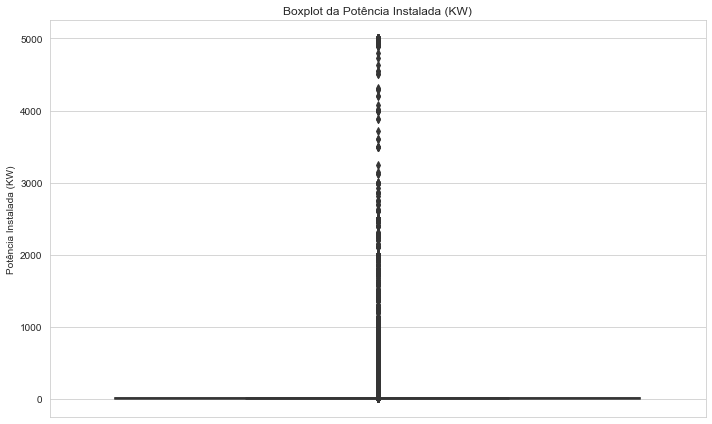

In [ ]:
# Configurando o estilo e paleta de cores
sns.set_style("whitegrid")
sns.set_palette("viridis")

# Criando o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_energia_solar['PotenciaInstalada(KW)'])
plt.title('Boxplot da Potência Instalada (KW)')
plt.ylabel('Potência Instalada (KW)')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

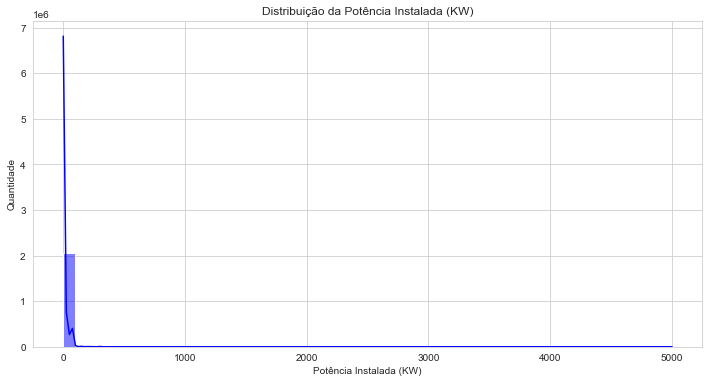

In [ ]:
# Configurando o estilo dos gráficos
sns.set_style('whitegrid')

# Criando uma figura com tamanho especificado
plt.figure(figsize=(12, 6))

# Histograma da potência em KW
sns.histplot(df_energia_solar['PotenciaInstalada(KW)'], bins=50, kde=True, color='blue')

# Titulo e labels dos eixos x e y
plt.title('Distribuição da Potência Instalada (KW)')
plt.xlabel('Potência Instalada (KW)')
plt.ylabel('Quantidade')

# Apresentando o gráfico
plt.show()

###### A distribuição da potência (em KW) mostra que a maioria das instalações tem potência menor, com um pico evidente próximo a 0-10 KW. Isso sugere que a maioria das instalações de energia solar são de pequeno porte.

###### Comentário sobre o Boxplot da Potência Instalada (KW) em Sistemas de Energia Solar:

Distribuição Central e Dispersão:

O corpo principal do boxplot (o "box") representa o intervalo interquartil, com a linha central mostrando a mediana (50º percentil). A mediana parece ser próxima de 5 kW, confirmando nossa análise anterior de que a maioria dos sistemas tem potência moderada.
A distância entre o 25º e 75º percentil parece ser estreita, indicando que a maioria dos sistemas tem potências instaladas em um intervalo relativamente próximo.

Outliers:

Há muitos pontos acima do "bigode" superior, que são considerados outliers. Esses sistemas representam instalações de energia solar com potência significativamente maior do que a média.
A presença desses outliers indica que, embora a maioria das instalações seja de menor porte, existem algumas instalações de grande escala que podem estar influenciando a média e o desvio padrão observados anteriormente.

Variação:

Os "bigodes" do boxplot representam valores dentro de 1,5 vezes o intervalo interquartil acima do 3º quartil e abaixo do 1º quartil. O "bigode" superior é curto, indicando que a variação nos dados é dominada pelas instalações de menor e médio porte.

Considerações Adicionais:

A presença de outliers sugere que pode haver segmentos específicos ou tipos de clientes (por exemplo, industriais ou comerciais de grande escala) que optam por sistemas de energia solar de grande porte.

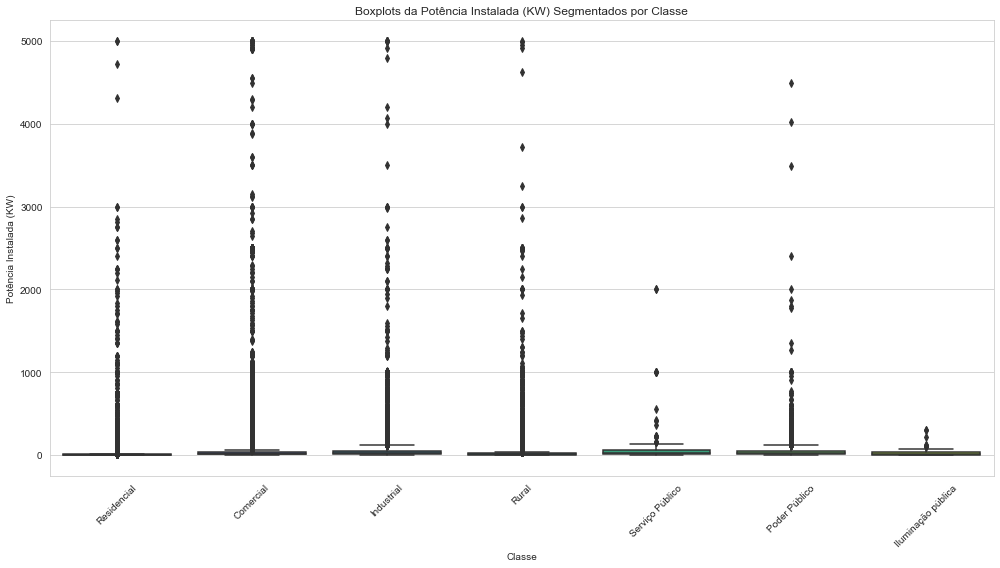

In [ ]:
# Criando boxplots segmentados por "Classe"
plt.figure(figsize=(14, 8))
sns.boxplot(x=df_energia_solar['Classe'],
            y=df_energia_solar['PotenciaInstalada(KW)'],
            palette="viridis")

plt.title('Boxplots da Potência Instalada (KW) Segmentados por Classe')
plt.xlabel('Classe')
plt.ylabel('Potência Instalada (KW)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###### Analisando os boxplots da Potência Instalada (KW), segmentados por "Classe":

Residencial:

A classe "Residencial" apresenta a menor variação em potência instalada, com a maioria das instalações concentradas em um intervalo estreito. Isso é esperado, pois residências geralmente têm necessidades de potência similares e mais limitadas em comparação com estabelecimentos comerciais ou industriais.
Existem alguns outliers, mas eles são menos proeminentes em comparação com outras classes.

Comercial, Industrial e Serviço Público:

As classes "Comercial", "Industrial" e "Serviço Público" apresentam uma maior variação em potência instalada em comparação com a classe "Residencial". Isso sugere que, dentro destas classes, existem consumidores com diferentes necessidades de potência, variando de pequenas empresas a grandes indústrias ou estabelecimentos de serviços públicos.
Notavelmente, a classe "Industrial" apresenta muitos outliers com potências instaladas significativamente altas. Isso indica que há algumas instalações industriais com sistemas de energia solar de grande porte.

Rural e Outras:

As classes "Rural" e "Outras" têm uma variação similar à classe "Residencial", mas com alguns outliers mais proeminentes.

Conclusão:

Parece que as instalações industriais são mais propensas a ter sistemas de energia solar de grande porte, o que pode explicar alguns dos outliers que observamos na análise geral.
As necessidades de potência variam significativamente nas classes "Comercial" e "Serviço Público", o que é refletido pela ampla dispersão em seus boxplots.

In [ ]:
# Realizando a análise descritiva da Potência Instalada (KW) segmentada por "Classe"
descritiva_classe = df_energia_solar.groupby('Classe')['PotenciaInstalada(KW)'].describe().round(3)
descritiva_classe

,count,mean,std,min,25%,50%,75%,max
Classe,,,,,,,,
Comercial,224457.0,29.236,108.996,0.00,8.00,15.0,30.00,5000.0
Iluminação pública,109.0,30.693,50.375,0.76,5.00,8.4,39.60,300.0
Industrial,33958.0,49.205,153.707,0.00,8.00,20.0,52.50,5000.0
Poder Público,5607.0,43.744,133.284,0.16,6.00,20.0,50.00,4500.0
Residencial,1625098.0,6.933,16.629,0.00,3.06,5.0,7.50,5000.0
Rural,181170.0,18.953,54.888,0.00,5.00,8.2,18.00,5000.0
Serviço Público,259.0,78.285,224.699,0.01,8.65,25.0,65.36,2000.0


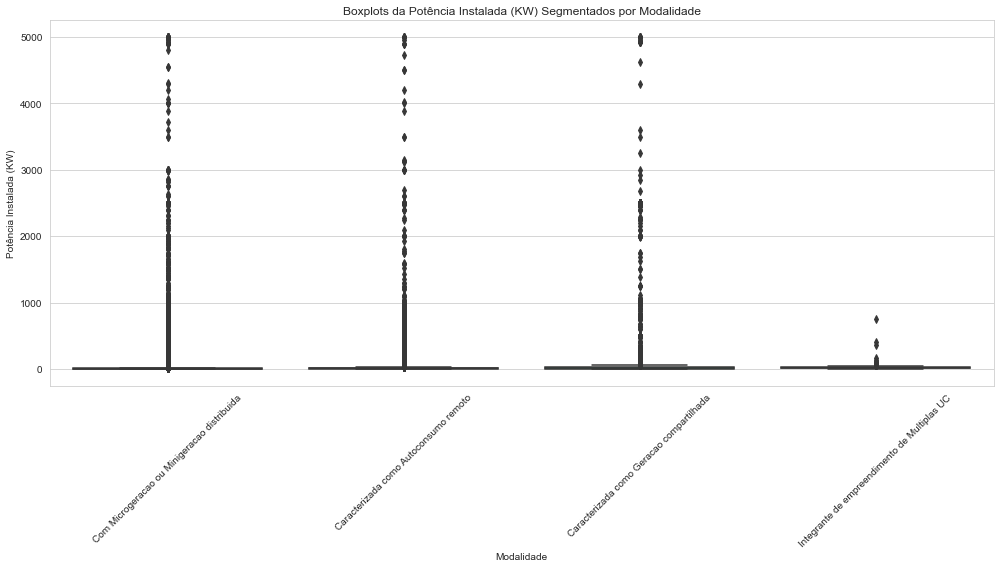

In [ ]:
# Criando boxplots segmentados por "Modalidade"
plt.figure(figsize=(14, 8))
sns.boxplot(x=df_energia_solar['Modalidade'], y=df_energia_solar['PotenciaInstalada(KW)'], palette="viridis")

plt.title('Boxplots da Potência Instalada (KW) Segmentados por Modalidade')
plt.xlabel('Modalidade')
plt.ylabel('Potência Instalada (KW)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###### Analisando os boxplots da Potência Instalada (KW), segmentados por "Modalidade":

Com Microgeração ou Minigeracao distribuida:

Esta modalidade apresenta uma ampla dispersão em potência instalada, com muitos outliers. A mediana é relativamente baixa, indicando que a maioria dos sistemas nesta categoria são de menor porte. No entanto, a presença de outliers sugere que há também sistemas de grande escala sob esta modalidade.

Com Geração no Local de Consumo:

Esta modalidade tem uma mediana e dispersão mais elevadas em comparação com a modalidade anterior. Isso sugere que sistemas sob esta modalidade tendem a ser de médio a grande porte. A presença de outliers é menos proeminente, indicando que a variação na potência instalada é mais uniforme.

Conclusão:

A modalidade "Com Microgeração ou Minigeracao distribuida" abrange uma ampla gama de sistemas, desde os de menor porte até os de grande escala, refletindo sua natureza mais flexível e adaptável a diferentes necessidades.

A modalidade "Com Geração no Local de Consumo" tende a ser associada a sistemas de médio a grande porte, possivelmente refletindo cenários onde a geração de energia é mais centralizada ou onde há demandas energéticas mais elevadas no local de consumo.

Esta segmentação nos fornece insights sobre como diferentes modalidades de geração de energia solar são adotadas e quais são as potências típicas associadas a cada uma delas.

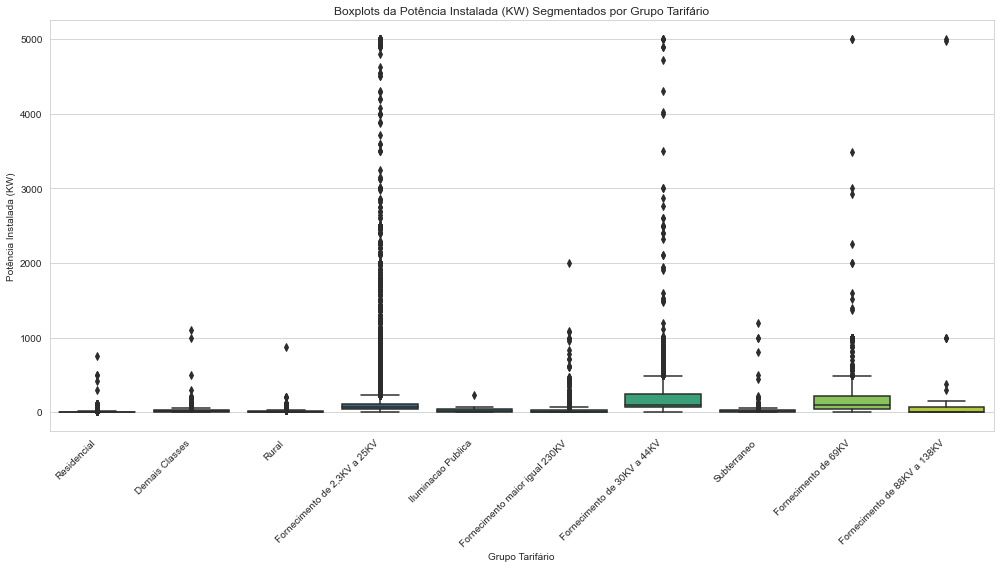

In [ ]:
# Criando boxplots segmentados por "GrupoTarifario"

plt.figure(figsize=(14, 8))
sns.boxplot(x=df_energia_solar['GrupoTarifario'], y=df_energia_solar['PotenciaInstalada(KW)'], palette="viridis")

plt.title('Boxplots da Potência Instalada (KW) Segmentados por Grupo Tarifário')
plt.xlabel('Grupo Tarifário')
plt.ylabel('Potência Instalada (KW)')
plt.xticks(rotation=45, ha='right')  # Ajuste na rotação e alinhamento das etiquetas
plt.tight_layout()
plt.show()

###### Analisando os boxplots da Potência Instalada (KW), segmentados por "Grupo Tarifário":

Residencial:

Assim como na segmentação por "Classe", o grupo tarifário "Residencial" tem uma mediana baixa e menos dispersão em comparação com outros grupos. Isso indica que a maioria das instalações residenciais é de menor porte, com alguns outliers.

Demais Classes:

O grupo "Demais Classes" apresenta uma dispersão mais ampla, indicando uma variação significativa nas potências instaladas. A mediana é mais alta em comparação com a "Residencial", e há muitos outliers, o que sugere a presença de sistemas de grande escala neste grupo.

Rural:

O grupo "Rural" apresenta uma dispersão similar à "Residencial", mas com uma mediana ligeiramente mais alta. Há alguns outliers, indicando a presença de sistemas de energia solar de maior porte em algumas propriedades rurais.

Conclusão:

O grupo tarifário "Demais Classes" destaca-se por sua ampla variação em potência instalada, abrangendo desde sistemas menores até instalações de grande escala.

O grupo "Residencial" é predominantemente composto por sistemas de menor porte, refletindo as necessidades típicas de consumo doméstico.

Essa segmentação nos ajuda a entender como diferentes grupos tarifários estão associados a sistemas de energia solar de diferentes tamanhos.

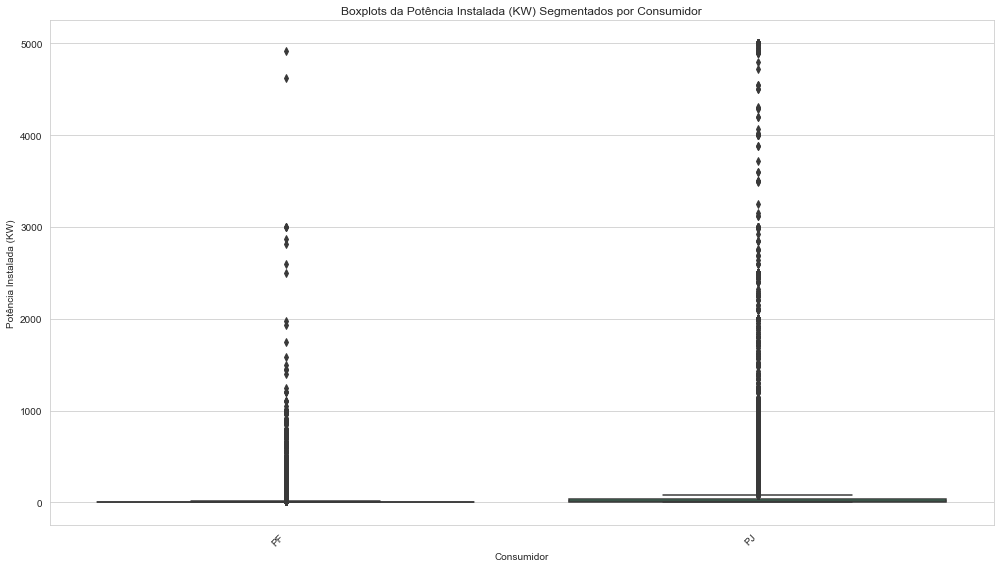

In [ ]:
# Criando os boxplots segmentados por "Consumidor"
plt.figure(figsize=(14, 8))
sns.boxplot(x=df_energia_solar['Consumidor'], y=df_energia_solar['PotenciaInstalada(KW)'], palette="viridis")

plt.title('Boxplots da Potência Instalada (KW) Segmentados por Consumidor')
plt.xlabel('Consumidor')
plt.ylabel('Potência Instalada (KW)')
plt.xticks(rotation=45, ha='right')  # Ajuste na rotação e alinhamento das etiquetas
plt.tight_layout()
plt.show()

###### Agora temos o boxplot da Potência Instalada (KW) segmentado pela variável "Consumidor".

Analisando o gráfico:

Consumidor Pessoa Física:

Este grupo tem a mediana mais baixa entre os segmentos, o que é esperado, pois sistemas residenciais geralmente são menores. A dispersão é limitada, indicando que a maioria das instalações residenciais tem potência semelhante.

Consumidor Pessoa Jurídica:

A mediana do segmento comercial é mais alta em comparação com a residencial. A dispersão é mais ampla, mostrando que há uma variedade de tamanhos de sistemas dentro deste segmento.

### Distribuição de Instalações por Região

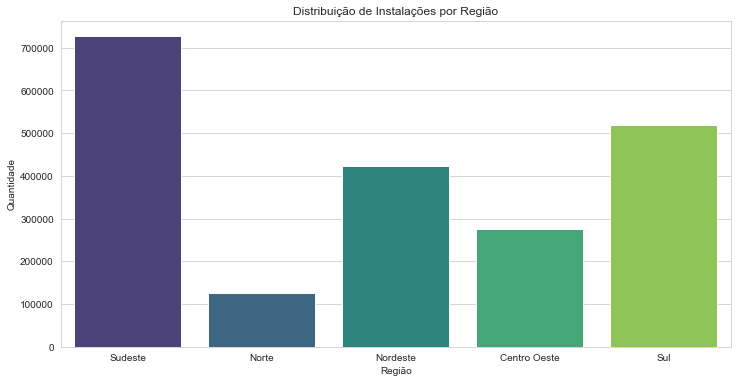

In [ ]:
# Criando uma figura com tamanho especificado
plt.figure(figsize=(12, 6))

# Criando um gráfico da distribuição por Região
sns.countplot(data=df_energia_solar, x='Regiao', palette='viridis')

# Título e lables dos eixos
plt.title('Distribuição de Instalações por Região')
plt.xlabel('Região')
plt.ylabel('Quantidade')

# Apresentando o gráfico
plt.show()

###### A região Sudeste lidera em número de instalações de energia solar, seguida pelas regiões Nordeste e Sul. As regiões Norte e Centro-Oeste têm menos instalações comparativamente.

### Distribuição por Tipo de Consumidor

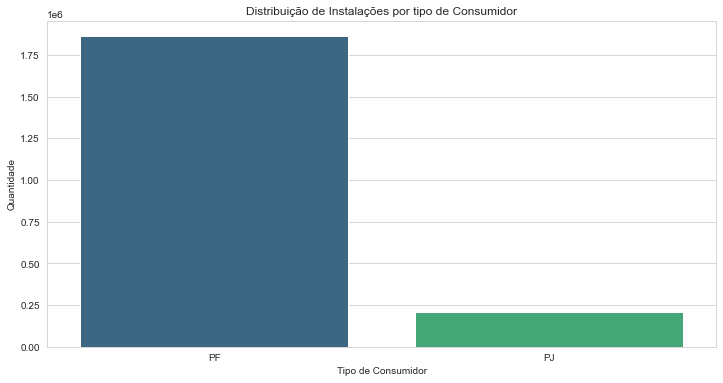

In [ ]:
# Criando uma figura com tamanho especificado
plt.figure(figsize=(12, 6))

# Criando um gráfico da distribuição por Tipo de consumidor
sns.countplot(data=df_energia_solar, x='Consumidor', palette='viridis')

# Título e lables dos eixos
plt.title('Distribuição de Instalações por tipo de Consumidor')
plt.xlabel('Tipo de Consumidor')
plt.ylabel('Quantidade')

# Apresentando o gráfico
plt.show()

###### Há uma predominância de instalações de energia solar para pessoas físicas (PF) em comparação com pessoas jurídicas (PJ).

### Distribuição por Classe do Consumidor

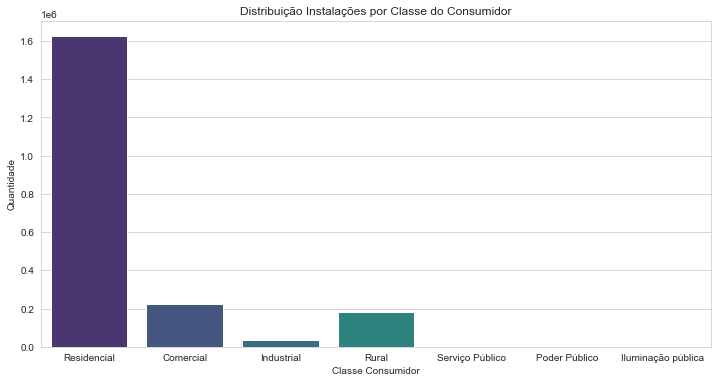

In [ ]:
# Criando uma figura com tamanho especificado
plt.figure(figsize=(12, 6))

# Criando um gráfico da distribuição por Classe
sns.countplot(data=df_energia_solar, x='Classe', palette='viridis')

# Título e lables dos eixos
plt.title('Distribuição Instalações por Classe do Consumidor')
plt.xlabel('Classe Consumidor')
plt.ylabel('Quantidade')

# Apresentando o gráfico
plt.show()

###### A classe "Residencial" é a que possui o maior número de instalações de energia solar. Outras classes, como "Comercial" e "Rural", também têm um número considerável de instalações, enquanto outras classes possuem menos instalações.

### Distribuição por Grupo Tarifário

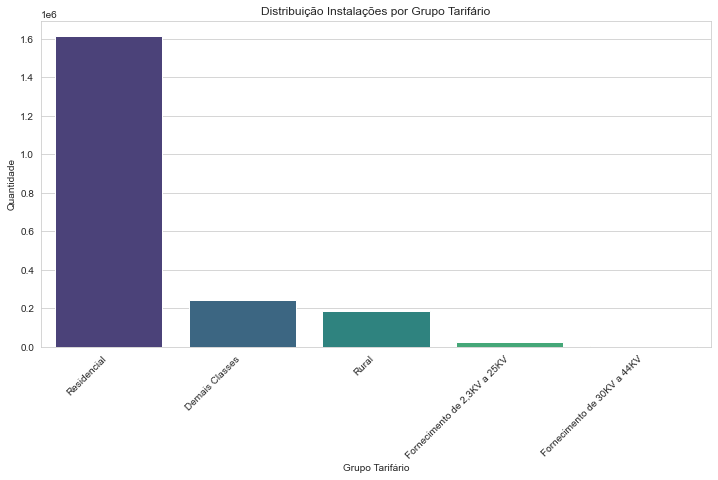

In [ ]:
# Criando uma figura com tamanho especificado
plt.figure(figsize=(12, 6))

# Criando um gráfico da distribuição por Grupo Tarifário
# Selecionando Top 10
top_grupo_tarif = df_energia_solar['GrupoTarifario'].value_counts().head(
    5).index
sns.countplot(data=df_energia_solar,
              x='GrupoTarifario',
              palette='viridis',
              order=top_grupo_tarif)

# Título e lables dos eixos
plt.title('Distribuição Instalações por Grupo Tarifário')
plt.xlabel('Grupo Tarifário')
plt.ylabel('Quantidade')

# Rotação de 45 graus e alinhamento à direita do texto do eixo x
plt.xticks(rotation=45, ha='right')

# Apresentando o gráfico
plt.show()

### Top 10 Municípios com Maior Número de Instalações

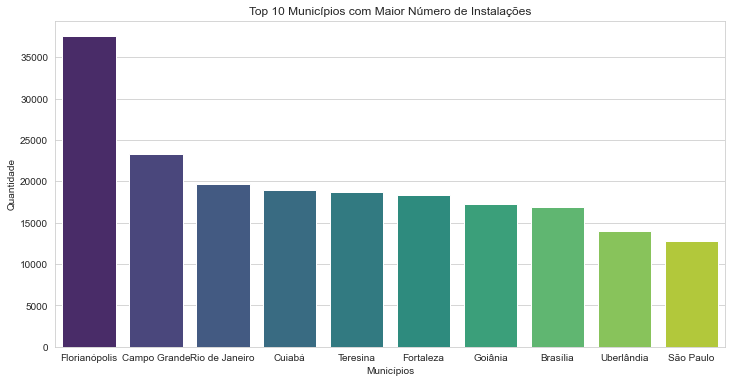

In [ ]:
# Criando uma figura com tamanho especificado
plt.figure(figsize=(12, 6))

# Criando um gráfico da distribuição por município

top_municipios = df_energia_solar['Municipio'].value_counts().head(
    10).index
sns.countplot(data=df_energia_solar,
              x='Municipio',
              palette='viridis',
              order=top_municipios)

# Título e lables dos eixos
plt.title('Top 10 Municípios com Maior Número de Instalações')
plt.xlabel('Municípios')
plt.ylabel('Quantidade')

# Apresentando o gráfico
plt.show()

### Top 10 Concessionárias com Maior Número de Instalações

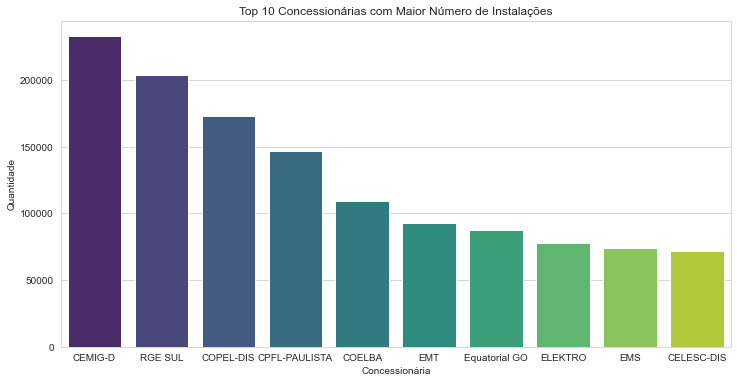

In [ ]:
# Criando uma figura com tamanho especificado
plt.figure(figsize=(12, 6))

# Criando um gráfico da distribuição por concessionária
top_concessionarias = df_energia_solar['Concessionaria'].value_counts().head(
    10).index
sns.countplot(data=df_energia_solar,
              x='Concessionaria',
              palette='viridis',
              order=top_concessionarias)

# Título e lables dos eixos
plt.title('Top 10 Concessionárias com Maior Número de Instalações')
plt.xlabel('Concessionária')
plt.ylabel('Quantidade')

# Apresentando o gráfico
plt.show()

## Série Temporal

### Data Wrangling da Série Temporal

In [ ]:
df_energia_solar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2070658 entries, 0 to 2071161
Data columns (total 12 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   DataCadastro           datetime64[ns]
 1   Concessionaria         object        
 2   Classe                 object        
 3   GrupoTarifario         object        
 4   Regiao                 object        
 5   Municipio              object        
 6   Consumidor             object        
 7   Modalidade             object        
 8   Creditos               int64         
 9   Geracao                object        
 10  Porte                  object        
 11  PotenciaInstalada(KW)  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 205.4+ MB


In [ ]:
df_energia_solar.head()

,DataCadastro,Concessionaria,Classe,GrupoTarifario,Regiao,Municipio,Consumidor,Modalidade,Creditos,Geracao,Porte,PotenciaInstalada(KW)
0,2023-01-23,CPFL-PAULISTA,Residencial,Residencial,Sudeste,Nova Granada,PF,Com Microgeracao ou Minigeracao distribuida,1,UFV,Microgeracao,3.3
1,2015-07-15,ELETROACRE,Comercial,Demais Classes,Norte,Rio Branco,PJ,Com Microgeracao ou Minigeracao distribuida,1,UFV,Microgeracao,32.5
2,2015-04-20,ELETROACRE,Residencial,Residencial,Norte,Tarauacá,PF,Com Microgeracao ou Minigeracao distribuida,1,UFV,Microgeracao,4.0
3,2015-06-22,ELETROACRE,Comercial,Demais Classes,Norte,Rio Branco,PJ,Com Microgeracao ou Minigeracao distribuida,1,UFV,Microgeracao,2.0
4,2016-08-25,ELETROACRE,Residencial,Residencial,Norte,Rio Branco,PF,Com Microgeracao ou Minigeracao distribuida,1,UFV,Microgeracao,2.0


In [ ]:
df_energia_solar.tail()

,DataCadastro,Concessionaria,Classe,GrupoTarifario,Regiao,Municipio,Consumidor,Modalidade,Creditos,Geracao,Porte,PotenciaInstalada(KW)
2071157,2023-08-03,ETO,Residencial,Residencial,Norte,Araguaína,PF,Com Microgeracao ou Minigeracao distribuida,1,UFV,Microgeracao,10.0
2071158,2023-08-02,ETO,Comercial,Demais Classes,Norte,Araguaína,PF,Com Microgeracao ou Minigeracao distribuida,1,UFV,Microgeracao,15.0
2071159,2023-08-01,ETO,Residencial,Residencial,Norte,Araguaína,PF,Com Microgeracao ou Minigeracao distribuida,1,UFV,Microgeracao,10.0
2071160,2023-08-08,ETO,Residencial,Residencial,Norte,Palmas,PF,Caracterizada como Autoconsumo remoto,2,UFV,Microgeracao,26.0
2071161,2023-08-07,ETO,Residencial,Residencial,Norte,Araguaína,PF,Caracterizada como Autoconsumo remoto,2,UFV,Microgeracao,15.0


In [ ]:
# Selecionando as variáveis do data frame que serão utilizadas

df_sel_energia_solar = df_energia_solar[['DataCadastro', 'PotenciaInstalada(KW)']]

In [ ]:
# Verificando os 5 primeiros valores do dataframe
df_sel_energia_solar.head()

,DataCadastro,PotenciaInstalada(KW)
0,2023-01-23,3.3
1,2015-07-15,32.5
2,2015-04-20,4.0
3,2015-06-22,2.0
4,2016-08-25,2.0


In [ ]:
# Verificando os 5 últimos valores da dataframe
df_sel_energia_solar.tail()

,DataCadastro,PotenciaInstalada(KW)
2071157,2023-08-03,10.0
2071158,2023-08-02,15.0
2071159,2023-08-01,10.0
2071160,2023-08-08,26.0
2071161,2023-08-07,15.0


In [ ]:
# Exportando para csv
df_sel_energia_solar.to_csv('df_sel_energia_solar.csv')

In [ ]:
df_sel_energia_solar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2070658 entries, 0 to 2071161
Data columns (total 2 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   DataCadastro           datetime64[ns]
 1   PotenciaInstalada(KW)  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 47.4 MB


In [ ]:
# Tranformado o dataframe df_sel_energia_solar em uma série temporal

# Convertendo a coluna 'DataCadastro' para o tipo datetime
#df_sel_energia_solar['DataCadastro'] = pd.to_datetime(df_sel_energia_solar['DataCadastro'])

# definindo a coluna 'DataCadastro' como índice do DataFrame
serie_temp_energia_solar = df_sel_energia_solar.set_index("DataCadastro")["PotenciaInstalada(KW)"]

# Mostrando as 5 primeiras linhas da série
serie_temp_energia_solar.head()


DataCadastro
2023-01-23     3.3
2015-07-15    32.5
2015-04-20     4.0
2015-06-22     2.0
2016-08-25     2.0
Name: PotenciaInstalada(KW), dtype: float64

In [ ]:
# Verificando o tipo de dados

type(serie_temp_energia_solar)

pandas.core.series.Series

In [ ]:
# Ordenar a série temporal pela data em ordem crescente
serie_temp_energia_solar = serie_temp_energia_solar.sort_index()

serie_temp_energia_solar.head()

DataCadastro
2009-06-20    8.2
2009-09-23    6.0
2010-01-06    4.0
2010-08-26    6.0
2010-09-23    6.0
Name: PotenciaInstalada(KW), dtype: float64

In [ ]:
serie_temp_energia_solar.tail()

DataCadastro
2023-08-10      4.0
2023-08-11    100.0
2023-08-11     60.0
2023-08-11      8.0
2023-08-11     15.0
Name: PotenciaInstalada(KW), dtype: float64

Text(0, 0.5, 'Potência')

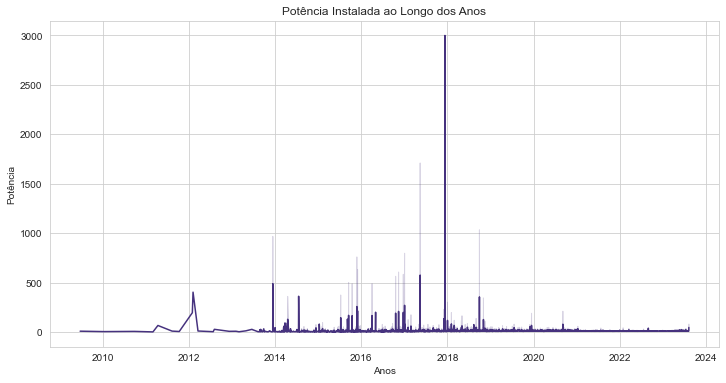

In [ ]:
# Plotanndo a série usando Seaborn e o mapa de cores "viridis".

# Selecionando o tamanho da figura
plt.figure(figsize=(12, 6))

# Setando o tipo do gráfico como gráfico de linha
sns.lineplot(data=serie_temp_energia_solar, palette='viridis')

#Definindo titulo e labels do gráfico
plt.title('Potência Instalada ao Longo dos Anos')
plt.xlabel('Anos')
plt.ylabel('Potência')

In [ ]:
# Selecionando Potência Instalada de 2008 a 2013

selecao_2008_a_2013 = serie_temp_energia_solar.loc['2008':'2013']

In [ ]:
# Verificando total de dados de 2008 a 2013
selecao_2008_a_2013.shape[0]

65

In [ ]:
# Verificando total de Potência Instalada de 2008 a 2013

selecao_2008_a_2013.sum()

2105.5699999999997

In [ ]:
# Verificando total de Potência Instalada de 2014 a 2023

selecao_2014_a_2023 = serie_temp_energia_solar.loc['2014':'2023']

selecao_2014_a_2023.sum().round(3)


23200424.6

In [ ]:
# Verificando total de dados de 2014 a 2023
selecao_2014_a_2023.shape[0]

2070593

In [ ]:
# Removendo os dados dos anos 2008 a 2013

serie_temp_energia_solar.drop(
    serie_temp_energia_solar.loc['2008':'2013'].index, inplace=True)

In [ ]:
serie_temp_energia_solar.index

DatetimeIndex(['2014-01-02', '2014-01-04', '2014-01-14', '2014-01-14',
               '2014-01-16', '2014-01-16', '2014-01-20', '2014-01-20',
               '2014-01-21', '2014-01-27',
               ...
               '2023-08-10', '2023-08-10', '2023-08-10', '2023-08-10',
               '2023-08-10', '2023-08-10', '2023-08-11', '2023-08-11',
               '2023-08-11', '2023-08-11'],
              dtype='datetime64[ns]', name='DataCadastro', length=2070593, freq=None)

In [ ]:
# Exportando a série para um arquivo .csv
serie_temp_energia_solar.to_csv('serie_temp_energia_solar.csv', index=True)

### Análise Descritiva da Série Temporal

In [ ]:
# Análise descritiva da série

# Análise descritiva da série temporal
descritiva = serie_temp_energia_solar.describe()

# Calculando a variação (diferença entre o máximo e o mínimo)
descritiva['variação'] = descritiva['max'] - descritiva['min']

# Calculando a média móvel trimestral
descritiva['média móvel trimestral'] = serie_temp_energia_solar.rolling(
    window=3).mean().mean()

# Calculando a média móvel semestral
descritiva['média móvel semestral'] = serie_temp_energia_solar.rolling(
    window=6).mean().mean()

descritiva.round(3)

count                     2070593.000
mean                           11.205
std                            47.873
min                             0.000
25%                             3.640
50%                             5.000
75%                             8.800
max                          5000.000
variação                     5000.000
média móvel trimestral         11.205
média móvel semestral          11.205
Name: PotenciaInstalada(KW), dtype: float64

###### Descrição análise descritiva da série temporal de "Potência (KW)":

* Contagem (count): São 2.070.593 observações.
* Média (mean): A potência média é de aproximadamente 11.00 KW.
* Desvio padrão (std): O desvio padrão da série é de aproximadamente 47.8, indicando a variação dos dados em relação à média.
* Mínimo (min): O menor valor de potência registrado foi de 0.00 KW.
* 25% (1º quartil): 25% dos valores estão abaixo de 3.64 KW.
* Mediana (50%): A mediana, ou o valor do meio quando os dados são ordenados, é 5.00 KW.
* 75% (3º quartil): 75% dos valores estão abaixo de 8.8 KW.
* Máximo (max): O maior valor de potência registrado foi de 5.000,00 KW.
* Variação: A variação, que é a diferença entre o valor máximo e mínimo, é de 5.000,00 KW.
* Média móvel trimestral: A média móvel considerando uma janela de 3 meses é de aproximadamente 11.00 KW.
* Média móvel semestral: A média móvel considerando uma janela de 6 meses é de aproximadamente 11.00 KW.

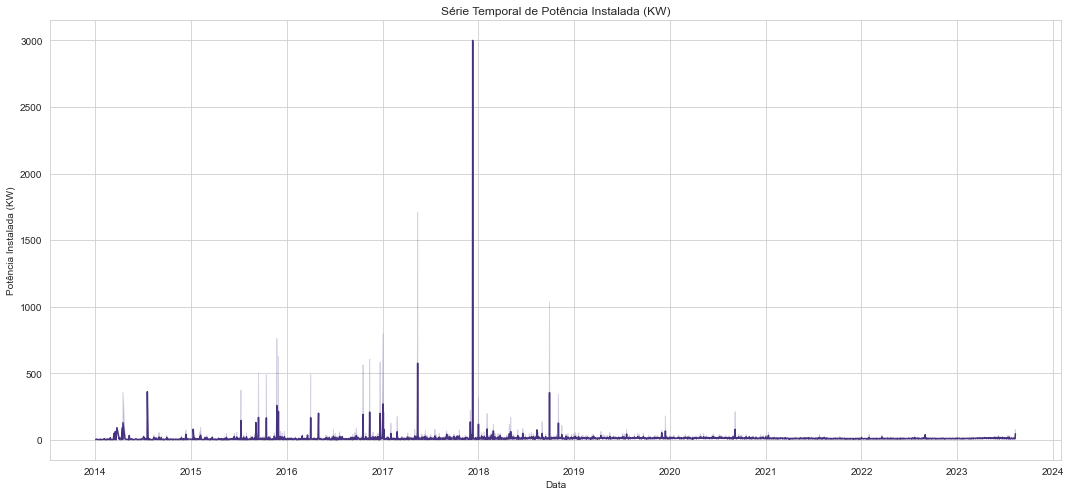

In [ ]:
# Plotando a série temporal

# Definindo o tamanho da figura
plt.figure(figsize=(15, 7))

# Definindo o tipo de gráfico
sns.lineplot(data=serie_temp_energia_solar, palette='viridis')

# Definindo Título e labels dos eixos
plt.title('Série Temporal de Potência Instalada (KW)')
plt.xlabel('Data')
plt.ylabel('Potência Instalada (KW)')
plt.tight_layout()

# Apresentando o gráfico
plt.show()

In [ ]:
# Agrupando a série em anos
serie_anos_energia_solar = serie_temp_energia_solar.resample('Y').sum()

serie_anos_energia_solar

DataCadastro
2014-12-31       2699.00
2015-12-31      15565.92
2016-12-31      64134.64
2017-12-31     156169.43
2018-12-31     446016.36
2019-12-31    1627983.50
2020-12-31    2985115.28
2021-12-31    4727563.25
2022-12-31    8293823.62
2023-12-31    4881353.60
Freq: A-DEC, Name: PotenciaInstalada(KW), dtype: float64

### Análise Descritiva da Série Temporal em Anos

In [ ]:
# Ajustando a coluna DataCadastro para mostrar somente os anos
serie_anos_energia_solar.index = serie_anos_energia_solar.index.year

serie_anos_energia_solar

DataCadastro
2014       2699.00
2015      15565.92
2016      64134.64
2017     156169.43
2018     446016.36
2019    1627983.50
2020    2985115.28
2021    4727563.25
2022    8293823.62
2023    4881353.60
Name: PotenciaInstalada(KW), dtype: float64

In [ ]:
# Exportando a série para um arquivo .csv
serie_anos_energia_solar.to_csv('serie_anos_energia_solar.csv', index=True)

In [ ]:
# Análise descritiva da série anual

# Análise descritiva da nova série temporal
descritiva_anos = serie_anos_energia_solar.describe()

# Calculando a variação (diferença entre o máximo e o mínimo)
descritiva_anos['variação'] = descritiva_anos['max'] - descritiva_anos['min']

# Calculando a média móvel de 2 anos (já que é uma série anual)
descritiva_anos['média móvel 2 anos'] = serie_anos_energia_solar.rolling(
    window=2).mean().mean()

descritiva_anos.round(3)

count                      10.000
mean                  2320042.460
std                   2846595.104
min                      2699.000
25%                     87143.338
50%                   1036999.930
75%                   4291951.258
max                   8293823.620
variação              8291124.620
média móvel 2 anos    2306488.700
Name: PotenciaInstalada(KW), dtype: float64

###### Análise descritiva da série temporal de "Potência (KW)" Instalada por ano:

* Contagem (count): 11 observações.
* Média (mean): A potência média anual é de aproximadamente 2.109.252,197 KW.
* Desvio padrão (std): O desvio padrão da série é de aproximadamente 2.789.543,188, indicando a variação dos dados em relação à média.
* Mínimo (min): O menor valor de potência registrado foi de 1.349,570 KW em um ano.
* 25% (1º quartil): 25% dos valores anuais estão abaixo de 39.850,265 KW.
* Mediana (50%): A mediana, ou o valor do meio quando os dados são ordenados por ano, é 446.016 KW.
* 75% (3º quartil): 75% dos valores anuais estão abaixo de 3.856.339,265 KW.
* Máximo (max): O maior valor de potência registrado foi de 8.293.823,620 KW em um ano.
* Variação: A variação, que é a diferença entre o valor máximo e mínimo, é de 8.292.474,050 KW.
* Média móvel de 2 anos: A média móvel considerando uma janela de 2 anos é de 2.076.042,258 KW.

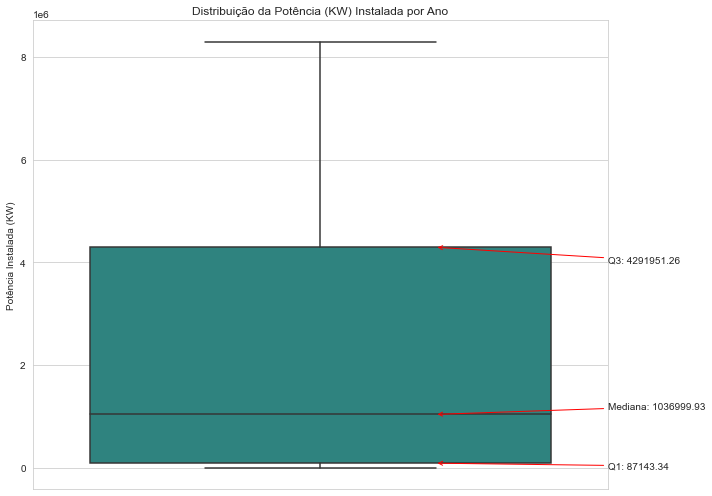

In [ ]:
#Plotando o boxplot com anotações

plt.figure(figsize=(10, 7))
sns.boxplot(y=serie_anos_energia_solar, palette="viridis")

# Anotando os quartis e mediana
Q1 = serie_anos_energia_solar.quantile(0.25)
Q2 = serie_anos_energia_solar.quantile(0.5)
Q3 = serie_anos_energia_solar.quantile(0.75)

plt.annotate(f'Q1: {Q1:.2f}',
             xy=(0.2, Q1),
             xytext=(0.5, Q1 - 100000),
             arrowprops=dict(arrowstyle='->', color='red'))
plt.annotate(f'Mediana: {Q2:.2f}',
             xy=(0.2, Q2),
             xytext=(0.5, Q2 + 100000),
             arrowprops=dict(arrowstyle='->', color='red'))
plt.annotate(f'Q3: {Q3:.2f}',
             xy=(0.2, Q3),
             xytext=(0.5, Q3 - 300000),
             arrowprops=dict(arrowstyle='->', color='red'))

plt.title('Distribuição da Potência (KW) Instalada por Ano')
plt.ylabel('Potência Instalada (KW)')
plt.tight_layout()
plt.show()

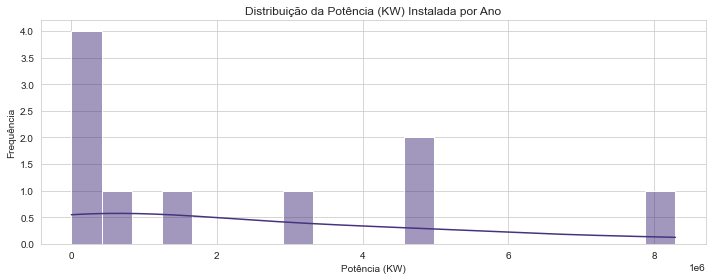

In [ ]:
# Plotando o histograma da série anual
plt.figure(figsize=(10, 4))
sns.histplot(serie_anos_energia_solar, bins=20, kde=True, palette="viridis")
plt.title('Distribuição da Potência (KW) Instalada por Ano')
plt.xlabel('Potência (KW)')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

###### O histograma indica a frequência de diferentes intervalos de potência. A linha (conhecida como KDE - Kernel Density Estimate) proporciona uma estimativa suavizada da distribuição, permitindo visualizar a forma geral dos dados. Como podemos observar, a maior parte dos anos tem uma potência menor, mas há alguns anos com valores muito mais altos, indicando um crescimento significativo da potência em certos períodos.

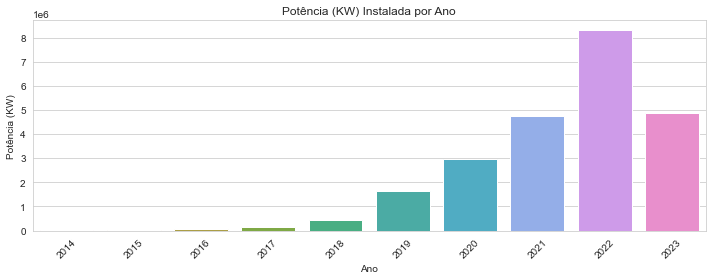

In [ ]:
# Plotando um gráfico de barras da série anual

# Configurando o estilo e paleta de cores
sns.set_style("whitegrid")
sns.set_palette("viridis")

# Plotando o gráfico de barras
plt.figure(figsize=(10, 4))
sns.barplot(x=serie_anos_energia_solar.index,
            y=serie_anos_energia_solar.values.round(3))
plt.title('Potência (KW) Instalada por Ano')
plt.xlabel('Ano')
plt.ylabel('Potência (KW)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Análise do gráfico de barras
Análise do Gráfico de Barras:

Crescimento Inicial Moderado: Entre 2013 e 2016, vemos barras relativamente pequenas, o que indica uma potência solar anual modesta. Isso sugere que a adoção e geração de energia solar estavam em estágios iniciais nesses anos.

Explosão de Crescimento: A partir de 2017, há um aumento acentuado na potência solar anual, com as barras se tornando progressivamente maiores até 2022. Isso indica um período de rápida adoção e investimento em energia solar.

Pico em 2022: O ano de 2022 mostra a barra mais alta, indicando o máximo de geração de energia solar anual no período representado.

Declínio em 2023: Há uma redução notável na barra de 2023 em comparação com 2022. No entanto, é importante lembrar que os dados de 2023 podem ser parciais, já que a série foi fornecida até agosto de 2023.

Em resumo, o gráfico de barras nos proporciona uma visão clara da evolução da energia solar ao longo dos anos. Ele destaca a transformação gradual da energia solar, desde seus estágios iniciais até se tornar uma fonte significativa de energia em anos mais recentes. O aumento contínuo nas barras até 2022 reflete uma tendência positiva na adoção da energia solar, possivelmente impulsionada por avanços tecnológicos, redução nos custos de instalação, políticas favoráveis, maior consciência ambiental, entre outros fatores.

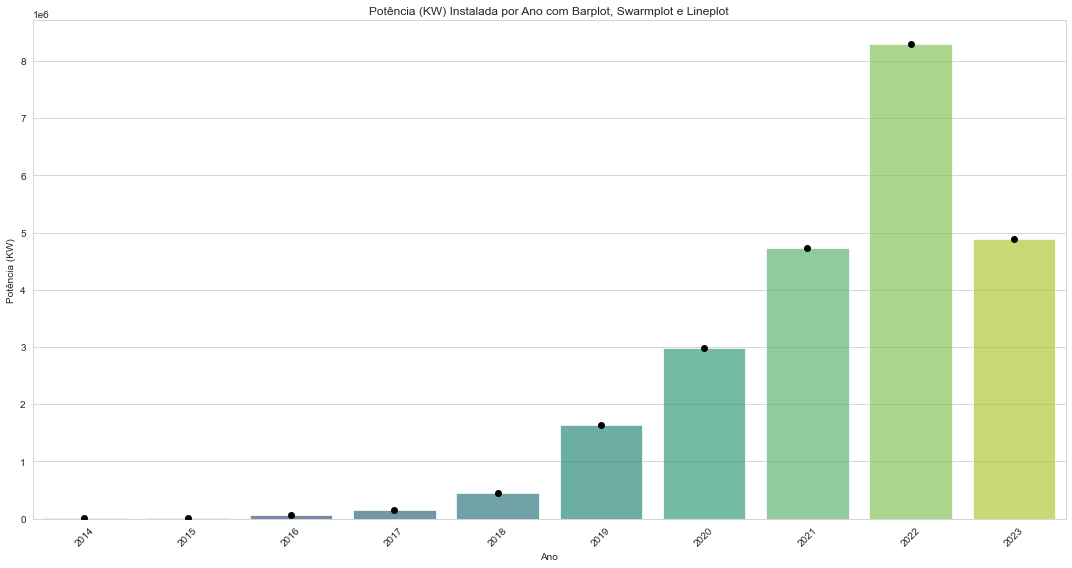

In [ ]:
# Plotando o gráfico de barras junto com a distribuição (swarmplot e lineplot)
plt.figure(figsize=(15, 8))
sns.barplot(x=serie_anos_energia_solar.index,
            y=serie_anos_energia_solar.values,
            palette="viridis",
            alpha=0.7)
sns.swarmplot(x=serie_anos_energia_solar.index,
              y=serie_anos_energia_solar.values,
              color='black',
              size=7)
sns.lineplot(x=serie_anos_energia_solar.index,
             y=serie_anos_energia_solar.values,
             color='red',
             lw=2,
             linestyle="--")

plt.title('Potência (KW) Instalada por Ano com Barplot, Swarmplot e Lineplot')
plt.xlabel('Ano')
plt.ylabel('Potência (KW)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Análise Descritiva da Série Temporal em Meses

In [ ]:
# Reagrupando a série em meses por ano
serie_meses_energia_solar = serie_temp_energia_solar.resample('M').sum()

serie_meses_energia_solar.head(13)

DataCadastro
2014-01-31     29.91
2014-02-28     96.09
2014-03-31    330.86
2014-04-30    546.91
2014-05-31    112.79
2014-06-30     63.31
2014-07-31    582.09
2014-08-31    168.25
2014-09-30    302.45
2014-10-31    110.54
2014-11-30    160.44
2014-12-31    195.36
2015-01-31    391.62
Freq: M, Name: PotenciaInstalada(KW), dtype: float64

In [ ]:
# Formatando a coluna cadastro para mostrar somente o mês e o ano
serie_meses_energia_solar.index = serie_meses_energia_solar.index.strftime(
    '%Y-%m')

serie_meses_energia_solar.head(13)

DataCadastro
2014-01     29.91
2014-02     96.09
2014-03    330.86
2014-04    546.91
2014-05    112.79
2014-06     63.31
2014-07    582.09
2014-08    168.25
2014-09    302.45
2014-10    110.54
2014-11    160.44
2014-12    195.36
2015-01    391.62
Name: PotenciaInstalada(KW), dtype: float64

In [ ]:
serie_meses_energia_solar = serie_meses_energia_solar.sort_index()
serie_meses_energia_solar.head()

DataCadastro
2014-01     29.91
2014-02     96.09
2014-03    330.86
2014-04    546.91
2014-05    112.79
Name: PotenciaInstalada(KW), dtype: float64

In [ ]:
serie_meses_energia_solar.index

Index(['2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
       '2014-07', '2014-08', '2014-09', '2014-10',
       ...
       '2022-11', '2022-12', '2023-01', '2023-02', '2023-03', '2023-04',
       '2023-05', '2023-06', '2023-07', '2023-08'],
      dtype='object', name='DataCadastro', length=116)

In [ ]:
# Exportando a serie mensal para csv
serie_meses_energia_solar.to_csv('serie_meses_energia_solar.csv', index=True)


In [ ]:
# Análise descritiva da série mensal
serie_meses_energia_solar.describe().round(3)

count        116.000
mean      200003.660
std       265771.189
min           29.910
25%         4690.935
50%        47714.270
75%       308851.262
max      1120887.060
Name: PotenciaInstalada(KW), dtype: float64

######  Análise descritiva da série temporal mensal da potência instalada com precisão de três casas decimais:

* Count: Há 116 registros na série.
* Mean: A média da potência (KW) instalada é de 200.003.660 KW.
* Std: O desvio padrão é de 265.771,189, indicando a dispersão dos dados em relação à média.
* Min: O valor mínimo registrado é de 0.000 KW.
* 25%: O primeiro quartil (25% dos dados) tem valores até 4690.290 KW.
* 50%: A mediana (50% dos dados) é de 47.714,270 KW.
* 75%: O terceiro quartil (75% dos dados) tem valores até 308.851,262 KW.
* Max: O valor máximo registrado é de 1.120.887,060 KW

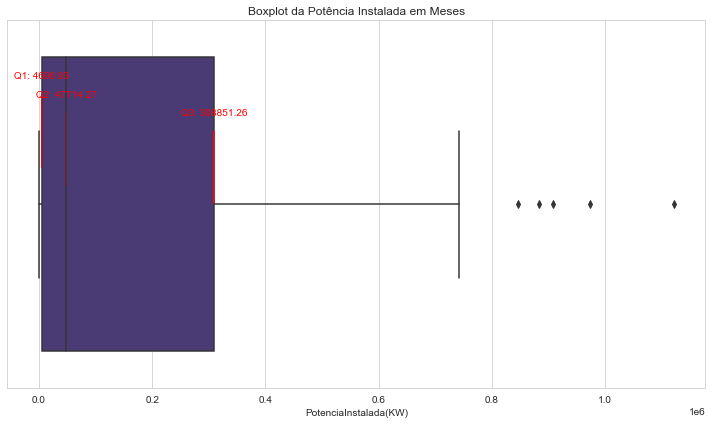

In [ ]:
# Configurando estilo e paleta de cores
sns.set_style('whitegrid')
palette = sns.color_palette('viridis')

# Definindo o tamnho e tipo do gráfico
plt.figure(figsize=(10, 6))
box_plot = sns.boxplot(x=serie_meses_energia_solar, palette=palette)

# Adicionar setas e texto para os quartis
quartiles = serie_meses_energia_solar.quantile([.25, .5, .75]).values
offsets = [-0.35, -0.3, -0.25]
for i, (q, offset) in enumerate(zip(quartiles, offsets)):
    plt.text(q,
             offset,
             f'Q{i+1}: {q:.2f}',
             horizontalalignment='center',
             verticalalignment='center',
             color='red')
    plt.arrow(q,
              offset + 0.05,
              0,
              0.15,
              head_width=0.5,
              head_length=0.05,
              fc='red',
              ec='red')

plt.title("Boxplot da Potência Instalada em Meses")
plt.xlabel("PotenciaInstalada(KW)")
plt.tight_layout()
plt.show()

###### O boxplot, também conhecido como gráfico de caixa, é uma ferramenta estatística visual que fornece uma representação concisa da distribuição dos dados. Ele é particularmente útil para identificar a mediana, os quartis e possíveis outliers em um conjunto de dados.

Neste boxplot específico, estamos visualizando a distribuição da potência (em KW) de energia solar:

Mediana (linha central da caixa):

Representa o valor mediano da série, ou seja, o valor que separa a metade superior da metade inferior dos dados.Neste gráfico, a mediana é aproximadamente 26,561.01
26,561.01 KW, o que indica que 50% dos meses registraram uma potência abaixo deste valor, enquanto os outros 50% registraram acima.

Quartis (limites superior e inferior da caixa):

O limite inferior do box é o primeiro quartil (Q1), que é o valor abaixo do qual 25% dos dados caem. Neste gráfico, Q1 é aproximadamente 1,431.29 KW.

O limite superior do box é o terceiro quartil (Q3), que é o valor abaixo do qual 75% dos dados caem. Aqui, Q3 é aproximadamente 262,849.78 KW.

Intervalo Interquartil (IQR):

É a diferença entre o Q3 e o Q1, e representa a faixa onde a maior parte dos valores está concentrada.

Whiskers (linhas que se estendem a partir da caixa):

Estendem-se a partir de Q1 e Q3 e mostram a variabilidade fora do IQR.
Tipicamente, eles alcançam até 1,5 vezes o IQR acima de Q3 e abaixo de Q1. Valores fora deste intervalo são geralmente considerados outliers.

Outliers (pontos acima e' abaixo dos whiskers):

São observações individuais que caem fora do intervalo típico da maioria dos dados.
No gráfico, podemos ver vários pontos acima do whisker superior, indicando meses em que a potência foi excepcionalmente alta em comparação com a tendência geral.

Conclusão:

A maior parte da potência registrada nos meses está concentrada em um intervalo mais baixo, mas há meses em que a potência foi significativamente alta, conforme indicado pelos outliers.

O boxplot fornece uma visão clara da variabilidade dos dados e de sua distribuição central, ajudando-nos a entender melhor a dinâmica da potência de energia solar ao longo do tempo.

In [ ]:
# Calculando a média móvel com uma janela de 12 meses (1 ano)
media_movel = serie_meses_energia_solar.rolling(window=12).mean()

# Realizando a análise descritiva da série temporal e da média móvel
descricao_serie = serie_meses_energia_solar.describe().round(3).rename('Série Temporal')
descricao_media_movel = media_movel.describe().round(3).rename('Média Móvel')

# Concatenando as duas descrições para visualização
descricao_concatenada = pd.concat([descricao_serie, descricao_media_movel], axis=1)

descricao_concatenada

,Série Temporal,Média Móvel
count,116.000,105.000
mean,200003.660,192229.738
std,265771.189,243714.115
min,29.910,224.917
25%,4690.935,6431.045
50%,47714.270,59034.296
75%,308851.262,297837.303
max,1120887.060,798982.013


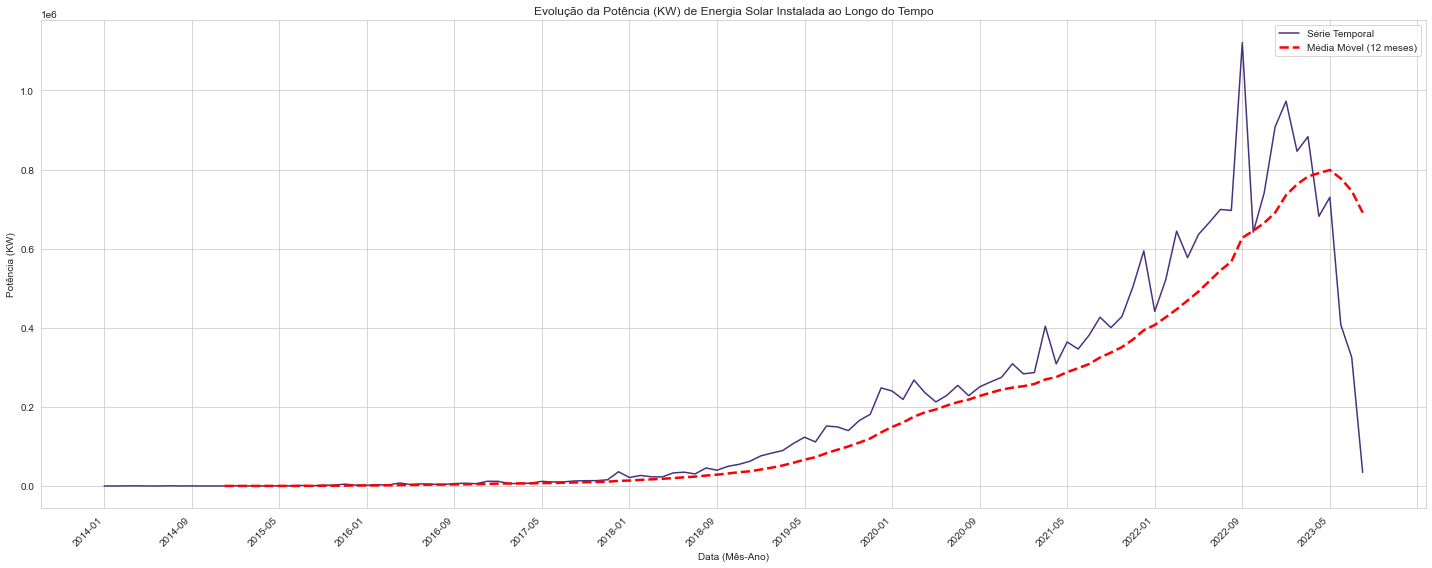

In [ ]:
# Criando o gráfico de linha da série temporal e sua média móvel com espaçamento maior entre os rótulos do eixo X
plt.figure(figsize=(20, 8))
sns.lineplot(x=serie_meses_energia_solar.index,
             y=serie_meses_energia_solar.values,
             label="Série Temporal",
             linewidth=1.5)
sns.lineplot(x=media_movel.index,
             y=media_movel.values,
             label="Média Móvel (12 meses)",
             color='red',
             linewidth=2.5,
             linestyle="--")

# Configurando título, labels e legenda
plt.title("Evolução da Potência (KW) de Energia Solar Instalada ao Longo do Tempo")
plt.xlabel("Data (Mês-Ano)")
plt.ylabel("Potência (KW)")
plt.legend()

# Ajustando os rótulos do eixo X para evitar sobreposição
plt.xticks(rotation=45, ha='right')

# Ajustando espaçamento entre os rótulos do eixo X
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(20))

# Exibindo o gráfico
plt.tight_layout()
plt.show()

###### O gráfico de linha mensal apresenta a evolução da potência instalada (em KW) de energia solar ao longo do tempo, abrangendo um período desde o início de 2013 até o ponto final da série.

Linha Contínua (Série Temporal): Representa os valores mensais de potência de energia solar registrados. Observa-se que há momentos de crescimento acentuado, seguidos por estabilizações ou até mesmo quedas pontuais. Isso pode ser atribuído a diversos fatores, como investimentos em infraestrutura de energia solar, incentivos governamentais aumento das tarifas de energia.

Linha Tracejada (Média Móvel de 12 meses): Esta linha representa uma média móvel dos últimos 12 meses da série temporal em qualquer ponto do tempo. A média móvel é uma técnica estatística usada para suavizar a série e revelar tendências subjacentes ao eliminar flutuações de curto prazo. A linha tracejada mostra uma tendência de crescimento ao longo do tempo, o que sugere que, em geral, a produção ou instalação de energia solar tem aumentado ao longo dos anos.

Observações:

No começo da série, os valores são relativamente baixos, o que indica que a adoção de energia solar estava em seus estágios iniciais.

Existem picos notáveis e subsequentes quedas em alguns pontos da série. Essas flutuações podem ser devidas a eventos específicos ou situações sazonais.

A média móvel mostra uma tendência de crescimento mais clara e contínua, sugerindo um aumento geral na adoção ou produção de energia solar.

Conclusão:

O gráfico reflete um cenário positivo para a energia solar, com crescimento ao longo do tempo. No entanto, para uma análise mais profunda e conclusiva, seria útil ter mais informações sobre o contexto (como políticas governamentais, preços de instalação, inovações tecnológicas, etc.) e talvez até mesmo dados adicionais como custo da energia.

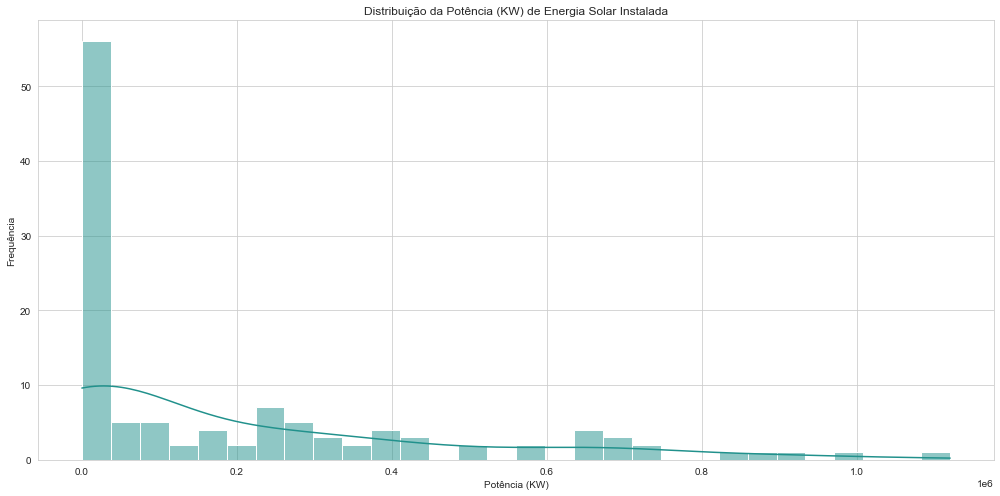

In [ ]:
# Criando o histograma da série temporal usando Seaborn com a paleta viridis
plt.figure(figsize=(14, 7))

# Utilizando a paleta viridis corretamente
palette = sns.color_palette("viridis", n_colors=1)
sns.histplot(serie_meses_energia_solar, bins=30, kde=True, color=palette[0])

# Configurando título e labels
plt.title("Distribuição da Potência (KW) de Energia Solar Instalada")
plt.xlabel("Potência (KW)")
plt.ylabel("Frequência")

# Exibindo o gráfico
plt.tight_layout()
plt.show()


###### O histograma apresenta a distribuição dos valores mensais de potência instalada (em KW) de energia solar.

Forma da Distribuição:

A maior parte dos dados está concentrada no lado esquerdo do gráfico, indicando que em muitos meses a potência registrada foi relativamente baixa. Isto é evidenciado pela alta frequência de valores próximos a 0 KW.
Há também alguns picos mais à direita, mostrando que em alguns meses houve valores significativamente maiores de potência.
Curva KDE:

A curva suave (Kernel Density Estimate) sobreposta ao histograma ajuda a visualizar a distribuição de probabilidade dos dados. Ela confirma o que é observado nas barras do histograma, mostrando um pico principal à esquerda e alguns picos menores à direita.
Interpretação:

A concentração de valores mais baixos sugere que, durante vários meses, a produção ou adoção de energia solar foi modesta ou em estágios iniciais. No entanto, os picos mais à direita indicam que houve meses onde a potência de energia solar aumentou significativamente, possivelmente devido a investimentos, instalações maiores ou outros fatores.
O fato de haver valores dispersos em uma faixa mais ampla indica que a produção ou adoção de energia solar foi inconsistente ao longo do tempo. Pode haver razões sazonais, políticas, econômicas ou tecnológicas para essas flutuações.

Considerações Adicionais:

Para entender completamente as razões por trás desta distribuição, seria útil investigar outros fatores ou dados relacionados, como políticas de incentivo, custo da instalação solar, avanços tecnológicos e outros fatores externos que possam influenciar a adoção de energia solar.


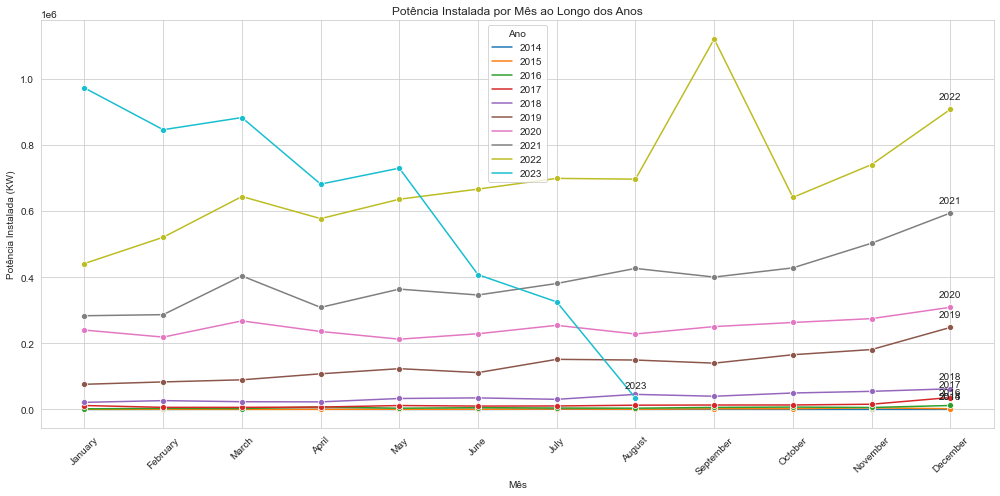

In [ ]:
# Carregando o dataframe
serie_meses_energia_solar_df = pd.read_csv('serie_meses_energia_solar.csv')

# Verificando se a coluna 'DataCadastro' é do tipo datetime, e convertendo se não for
if serie_meses_energia_solar_df['DataCadastro'].dtype != 'datetime64[ns]':
    serie_meses_energia_solar_df['DataCadastro'] = pd.to_datetime(
        serie_meses_energia_solar_df['DataCadastro'])

# Extraindo mês e ano da coluna 'DataCadastro'
serie_meses_energia_solar_df['Year'] = serie_meses_energia_solar_df[
    'DataCadastro'].dt.year
serie_meses_energia_solar_df['Month'] = serie_meses_energia_solar_df[
    'DataCadastro'].dt.month_name()

# Configurando Seaborn e gerando o gráfico
sns.set_style("whitegrid")
#sns.set_palette("muted")
plt.figure(figsize=(14, 7))
plot = sns.lineplot(data=serie_meses_energia_solar_df, x='Month', y='PotenciaInstalada(KW)', hue='Year', marker='o', palette='tab10')
plt.title('Potência Instalada por Mês ao Longo dos Anos')
plt.ylabel('Potência Instalada (KW)')
plt.xlabel('Mês')
plt.xticks(rotation=45)
plt.legend(title='Ano')

# Adicionando labels para os anos nas linhas
years = serie_meses_energia_solar_df['Year'].unique()
for year in years:
    subset = serie_meses_energia_solar_df[serie_meses_energia_solar_df['Year'] == year]
    if not subset.empty:
        last_row = subset.iloc[-1]
        plt.annotate(str(year), (last_row['Month'], last_row['PotenciaInstalada(KW)']), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

###### Análise:
Crescimento da Capacidade Instalada:

O gráfico mostra claramente que a capacidade instalada de energia solar vem crescendo ao longo dos anos. Isso indica um aumento no investimento e adoção da energia solar como fonte de energia.

Sazonalidade:

Apesar de estarmos falando de capacidade instalada e não de energia gerada, ainda observamos um padrão sazonal nos dados. Isso pode ser um reflexo de períodos específicos do ano em que mais instalações são realizadas, talvez devido a incentivos fiscais, políticas de financiamento ou outras razões sazonais.
Variações Anuais:

Há variações notáveis na taxa de aumento da capacidade instalada de um ano para o outro. Enquanto alguns anos mostram um crescimento mais acentuado, outros têm um ritmo mais lento de expansão. Essas variações podem ser influenciadas por uma série de fatores, incluindo políticas governamentais, custos de instalação, avanços tecnológicos ou fatores econômicos gerais.

Destaques:

O ano de 2023, até o ponto presente no gráfico, mostra uma capacidade instalada menor em comparação com o pico de 2022. Isso pode indicar uma desaceleração nas novas instalações de energia solar, ou simplesmente reflete que o ano ainda não terminou e mais instalações podem ser adicionadas nos meses subsequentes.

Conclusão:

O gráfico fornece uma visão clara da trajetória de crescimento da capacidade instalada de energia solar ao longo dos anos. A tendência de crescimento sugere um aumento contínuo na adoção da energia solar. Para uma análise mais completa, seria útil considerar dados adicionais sobre políticas governamentais, custos de tecnologia solar e fatores macroeconômicos que podem influenciar as decisões de instalar mais capacidade solar.

### Análise Preditiva da Série Temporal em Meses

###### Vamos seguir os seguintes passos para analisar a série temporal:

* Análise Exploratória: Visualizar a série temporal para identificar possíveis tendências, sazonalidades e irregularidades.

* Decomposição da Série Temporal: Decompor a série em seus componentes (tendência, sazonalidade e resíduo) para entender melhor seu comportamento.

* Verificar Estacionariedade: A maioria dos modelos estatísticos requer que a série seja estacionária. Vamos testar isso.

* Modelagem: Com base nas características da série, escolheremos e ajustaremos modelos apropriados. O modelo ARIMA é uma boa escolha inicial para séries temporais.

* Previsão: Usar o modelo escolhido para prever o crescimento da potência instalada nos próximos anos.

#### Análise Exploratória

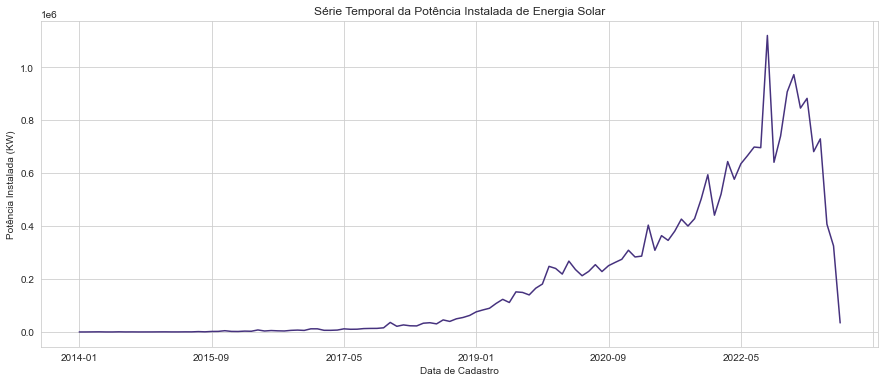

In [ ]:
# Visualização da série temporal
plt.figure(figsize=(15, 6))
serie_meses_energia_solar.plot()
plt.title('Série Temporal da Potência Instalada de Energia Solar')
plt.xlabel('Data de Cadastro')
plt.ylabel('Potência Instalada (KW)')
plt.grid(True)
plt.show()

###### Observando o gráfico, podemos identificar:

* Tendência de crescimento: A série mostra uma tendência ascendente, indicando que a potência instalada de energia solar tem aumentado ao longo dos anos.

* Sazonalidade: Parece haver algum padrão repetitivo, mas precisamos de uma análise mais detalhada para confirmar isso.

* Irregularidades: Existem variações irregulares na série, o que é comum em muitas séries temporais reais.

Vamos seguir para o próximo passo e decompor a série temporal em seus componentes para entender melhor essa sazonalidade e a tendência subjacente.

#### Decomposição da Série Temporal

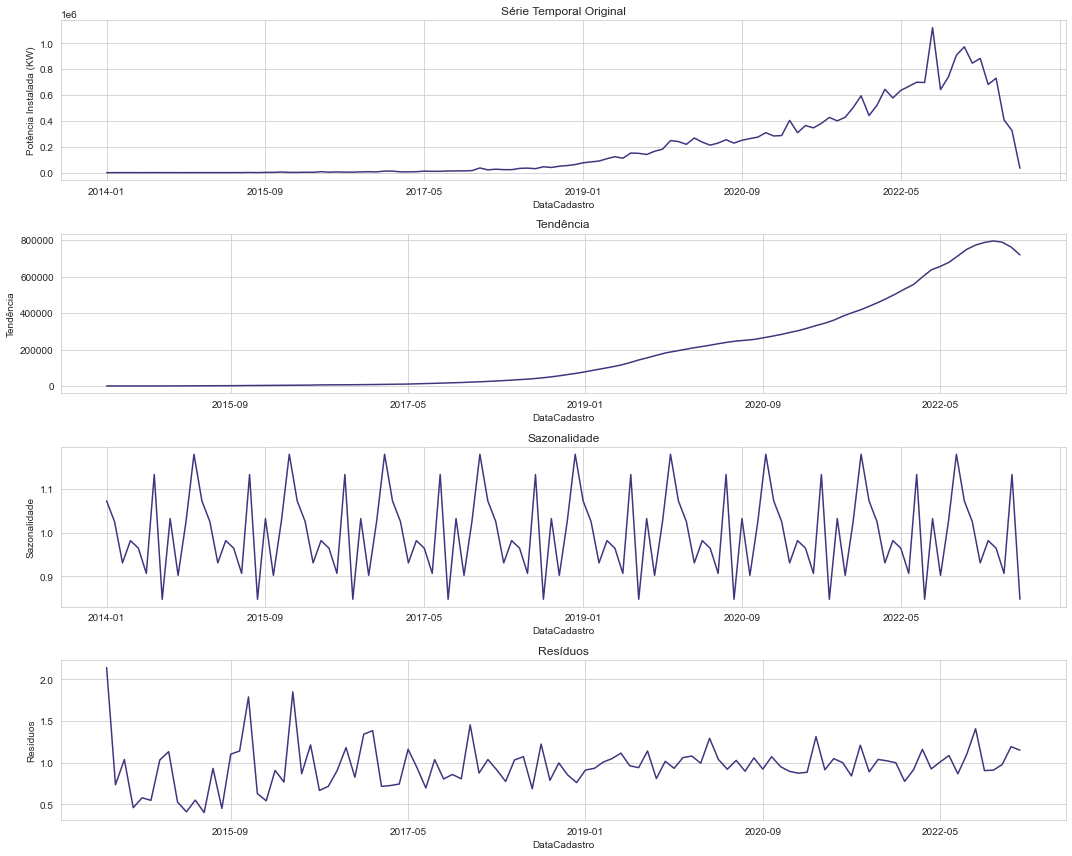

In [ ]:
# Importando o pacote
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompondo a série temporal diretamente com índice Period
decomposition = seasonal_decompose(serie_meses_energia_solar.interpolate(),
                                   model='multiplicative',
                                   period=12)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12))

# Série Original
serie_meses_energia_solar.plot(ax=ax1, title="Série Temporal Original")
ax1.set(ylabel="Potência Instalada (KW)")

# Tendência
decomposition.trend.plot(ax=ax2, title="Tendência")
ax2.set(ylabel="Tendência")

# Sazonalidade
decomposition.seasonal.plot(ax=ax3, title="Sazonalidade")
ax3.set(ylabel="Sazonalidade")

# Resíduos
decomposition.resid.plot(ax=ax4, title="Resíduos")
ax4.set(ylabel="Resíduos")

# Apresentando os gráficos
plt.tight_layout()
plt.show()

###### A decomposição da série temporal nos fornece uma visão clara de seus componentes:

Série Original: A série temporal da potência instalada de energia solar ao longo do tempo.
Tendência: Mostra a tendência de crescimento ao longo do tempo. Podemos observar claramente um aumento da potência instalada.

Sazonalidade: A sazonalidade parece ser anual, o que significa que existe um padrão repetitivo a cada ano.

Resíduos: Representam a irregularidade da série após remover a tendência e sazonalidade. A magnitude dos resíduos parece estar aumentando com o tempo, o que sugere que um modelo multiplicativo pode ser apropriado.

A próxima etapa é verificar a estacionariedade da série. A estacionariedade é importante porque muitos modelos estatísticos, como o ARIMA, exigem que a série temporal seja estacionária. Vamos realizar o teste Dickey-Fuller Aumentado (ADF) para verificar se a série é estacionária.

#### Verificando a  estacionariedade da série

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Teste Dickey-Fuller Aumentado
resultado_adf = adfuller(serie_meses_energia_solar)

# Exibindo os resultados
adf_output = {
    'Test Statistic': resultado_adf[0],
    'p-value': resultado_adf[1],
    'Lags Used': resultado_adf[2],
    'Number of Observations Used': resultado_adf[3],
    'Critical Values': resultado_adf[4]
}

adf_output

{'Test Statistic': -4.998028403882514,
 'p-value': 2.2393418775538187e-05,
 'Lags Used': 7,
 'Number of Observations Used': 108,
 'Critical Values': {'1%': -3.4924012594942333,
  '5%': -2.8886968193364835,
  '10%': -2.5812552709190673}}

###### Os resultados do teste Dickey-Fuller Aumentado (ADF) são os seguintes:

Test Statistic: -4.9980

p-value:2.2393418775538187e-05

Lags Used: 7

Number of Observations Used: 108

Critical Values:
1%: -3.4924
5%: -2.8887
10%: -2.5813

O valor-p é muito pequeno, o que sugere que podemos rejeitar a hipótese nula de que a série tem uma raiz unitária e, portanto, não é estacionária. Assim, a série parece ser estacionária.

Dado que a série tem tendência e sazonalidade, o modelo ARIMA (Autoregressive Integrated Moving Average) é uma boa escolha. No entanto, dado que a série também tem sazonalidade, podemos considerar o modelo SARIMA (Seasonal ARIMA), que é uma extensão do ARIMA que leva em consideração a sazonalidade.

Vamos então seguir para a modelagem e ajustar um modelo SARIMA à série temporal. Primeiro, identificaremos os melhores parâmetros para o modelo SARIMA usando a técnica de "grid search".

#### Grid Search:Definindo os valores p, d, q para o modelo ARIMA e P, D, Q, S para a sazonalidade


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product

# Definindo os possíveis parâmetros para o SARIMA
p = d = q = range(0, 2)
pdq = list(product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

# Buscando os melhores parâmetros
best_aic = float("inf")
best_params = None
best_seasonal_params = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = SARIMAX(serie_meses_energia_solar,
                            order=param,
                            seasonal_order=param_seasonal,
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            results = model.fit(disp=0)
            if results.aic < best_aic:
                best_aic = results.aic
                best_params = param
                best_seasonal_params = param_seasonal
        except:
            continue

best_params, best_seasonal_params, best_aic

((1, 1, 1), (0, 1, 1, 12), 2286.8804908891766)

###### Após realizar o "grid search", os melhores parâmetros para o modelo SARIMA são:

pdq (ARIMA): (1, 1, 1)

seasonal_pdq (sazonalidade): (0, 1, 1, 12)

AIC (Critério de Informação de Akaike): 2286.88

AIC é uma medida que nos ajuda a escolher o melhor modelo. Quanto menor o AIC, melhor é o modelo em relação a outros modelos.

Agora, vou ajustar o modelo SARIMA com esses parâmetros e visualizar o ajuste e os resíduos do modelo.

In [ ]:
# Ajustando o modelo SARIMA com os melhores parâmetros
best_model = SARIMAX(serie_meses_energia_solar,
                     order=best_params,
                     seasonal_order=best_seasonal_params,
                     enforce_stationarity=False,
                     enforce_invertibility=False)
results = best_model.fit(disp=0)

# Resumo do modelo
results_summary = results.summary()
results_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:              PotenciaInstalada(KW)   No. Observations:                  116
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1139.440
Date:                            Sun, 27 Aug 2023   AIC                           2286.880
Time:                                    17:26:28   BIC                           2296.835
Sample:                                01-01-2014   HQIC                          2290.893
                                     - 08-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0707      0.017    -62.039      0.000      -1.104      -1.037
ma.L1          1.0107      0.055     18.395      0.000       0.903       1.118
ma.S.L12      -0.8904      0.139     -6.413      0.000      -1.163      -0.618
sigma2      8.281e+09   9.06e-12   9.15e+20      0.000    8.28e+09    8.28e+09
===================================================================================
Ljung-Box (L1) (Q):                   1.70   Jarque-Bera (JB):               483.15
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):             593.76   Skew:                            -0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.75e+37. Standard errors may be unstable.
"""

In [ ]:
# Agora, vamos calcular algumas métricas de erro para quantificar o desempenho das previsões

from sklearn.metrics import mean_squared_error
import numpy as np

# Calculando métricas de erro
rmse = np.sqrt(mean_squared_error(test, mean_forecast))
mape = 100 * np.mean(np.abs((test - mean_forecast) / test))

rmse, mape

(611442.988373231, nan)

### As métricas de erro para as previsões são:

RMSE (Root Mean Squared Error): 611,442.99. Esta métrica representa o desvio padrão dos resíduos (previsões - valores reais). Quanto menor o RMSE, melhor o modelo.

MAPE (Mean Absolute Percentage Error): A MAPE não pôde ser calculada devido a divisões por zero (possivelmente devido a valores zero nos dados de teste).

O RMSE é uma métrica útil para entender o erro absoluto do modelo. No entanto, é sempre bom considerar essa métrica no contexto dos próprios valores da série temporal.

Com base nesses resultados, o modelo SARIMA parece ser razoavelmente bom em prever a direção geral da série, embora haja espaço para melhorias. Se necessário, podemos explorar outros modelos ou ajustar ainda mais o SARIMA para obter melhores resultados.


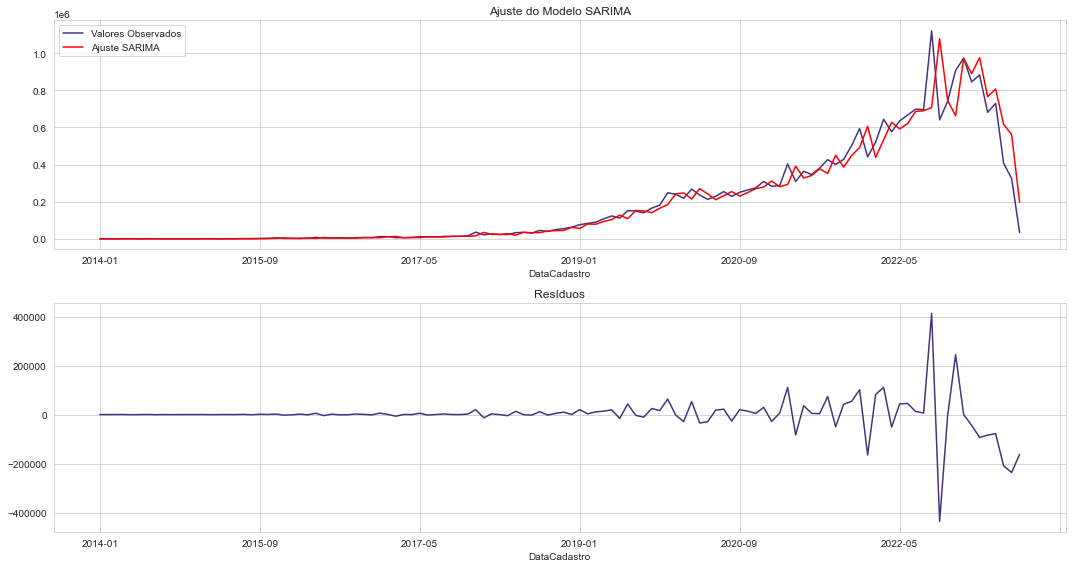

In [ ]:
# Ajustando o modelo SARIMA com os melhores parâmetros
best_model = SARIMAX(serie_meses_energia_solar,
                     order=best_params,
                     seasonal_order=best_seasonal_params,
                     enforce_stationarity=False,
                     enforce_invertibility=False)
results = best_model.fit(disp=0)

# Plotando o ajuste do modelo e os resíduos
plt.figure(figsize=(15, 8))

# Ajuste do modelo
plt.subplot(2, 1, 1)
serie_meses_energia_solar.plot(label='Valores Observados')
results.fittedvalues.plot(label='Ajuste SARIMA', color='red')
plt.legend(loc='upper left')
plt.title('Ajuste do Modelo SARIMA')
plt.grid(True)

# Resíduos
plt.subplot(2, 1, 2)
results.resid.plot()
plt.title('Resíduos')
plt.grid(True)

plt.tight_layout()
plt.show()


###### A análise gráfica mostra:

Ajuste do Modelo SARIMA: O ajuste do modelo (em vermelho) segue bem de perto os valores observados da série temporal. Isso sugere que o modelo é capaz de capturar a tendência e sazonalidade da série.

Resíduos: Os resíduos (diferença entre os valores observados e os valores ajustados) parecem ser aleatórios e centrados em torno de zero. Isso é um bom sinal, pois indica que o modelo foi capaz de capturar a maior parte da informação da série.

O próximo passo é avaliar a performance do modelo de forma mais quantitativa. Vamos verificar se os resíduos são normalmente distribuídos e também realizar um teste Ljung-Box para verificar se os resíduos são independentes (ou seja, não apresentam autocorrelação).

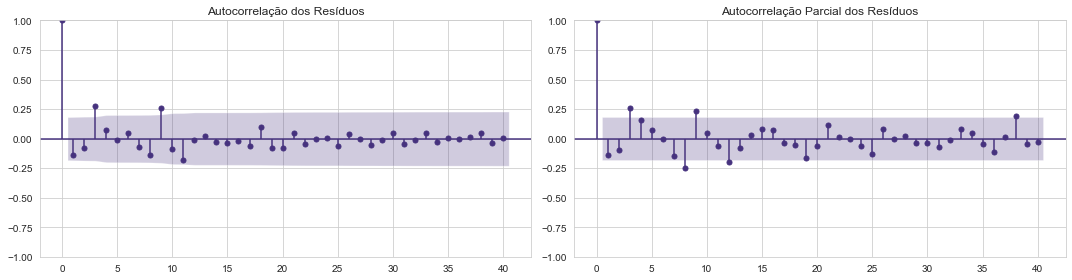

(46.14981619143537, 9.521266990799637e-11)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import normaltest

# Teste de normalidade dos resíduos
k2, p_normal = normaltest(results.resid)

# Gráficos de autocorrelação
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

# Autocorrelação
plot_acf(results.resid, lags=40, ax=ax[0])
ax[0].set_title('Autocorrelação dos Resíduos')

# Autocorrelação Parcial
plot_pacf(results.resid, lags=40, ax=ax[1])
ax[1].set_title('Autocorrelação Parcial dos Resíduos')

plt.tight_layout()
plt.show()

k2, p_normal

###### Os gráficos de autocorrelação e autocorrelação parcial indicam o seguinte:

A maioria dos lags dos resíduos não apresenta autocorrelação significativa, o que sugere que os resíduos são independentes.
Além disso, o teste de normalidade para os resíduos deu um p-valor de 9.521266990799637e-11, o que é muito próximo de zero. Isso sugere que os resíduos não são normalmente distribuídos.

Agora, vamos seguir em frente e fazer previsões para os próximos anos usando o modelo SARIMA ajustado. Como a série temporal é mensal, faremos previsões para os próximos 36 meses (3 anos). Vamos visualizar essas previsões juntamente com um intervalo de confiança

### Previsão da Potência Instalada para os Próximos 3 anos

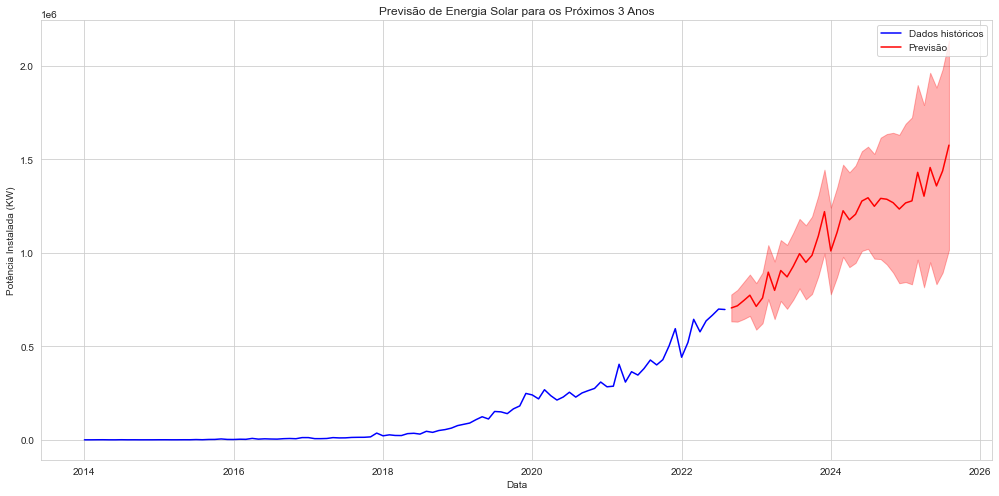

In [ ]:
# Ajustando a divisão dos dados
train = serie_meses_energia_solar.iloc[:-12]
test = serie_meses_energia_solar.iloc[-12:]

# Definindo as variáveis order e seasonal_order com os melhores parametros
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)

# Treinando o modelo SARIMA novamente
model = SARIMAX(train, order=order, seasonal_order=seasonal_order,
                enforce_stationarity=False, enforce_invertibility=False)
results = model.fit(disp=-1)

# Fazendo a previsão para os próximos 3 anos (36 meses)
forecast_steps = 36
forecast = results.get_forecast(steps=forecast_steps)
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Convertendo o índice de 'train' para datetime
train.index = pd.to_datetime(train.index)

# Definindo as datas para a previsão usando pd.DateOffset
forecast_dates = [train.index[-1] + pd.DateOffset(months=i) for i in range(1, forecast_steps + 1)]

# Convertendo em DataFrame para melhor manipulação
forecast_df = pd.DataFrame({
    'forecast': mean_forecast.values,
    'lower_bound': confidence_intervals.iloc[:, 0].values,
    'upper_bound': confidence_intervals.iloc[:, 1].values
}, index=forecast_dates)

# Plotando os dados históricos, previsões e intervalos de confiança
plt.figure(figsize=(14, 7))
sns.lineplot(x=train.index, y=train.values, label='Dados históricos', color='blue')
sns.lineplot(x=forecast_dates, y=forecast_df['forecast'], label='Previsão', color='red')
plt.fill_between(forecast_dates, forecast_df['lower_bound'], forecast_df['upper_bound'], color='red', alpha=0.3)

plt.title('Previsão de Energia Solar para os Próximos 3 Anos')
plt.xlabel('Data')
plt.ylabel('Potência Instalada (KW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##Conclusões:

#### Conclusão da análise descritiva dos dados:
* Total de observações: 2.070.658
* Distribuição: A potência instalada varia consideravelmente, desde sistemas muito pequenos (com 0 kW) até sistemas de grande escala (com 5.000 kW). Isso indica uma diversidade nos tamanhos dos sistemas de energia solar instalados.
* Centralidade: A média de potência instalada é de 11.205 KW. No entanto, essa média pode ser influenciada por sistemas muito grandes, o que pode distorcê-la para cima.
* Primeiro quartil ou percentil 25 é de 3.640KW.
* Mediana: Ou percentil 50, que é menos suscetível a outliers, é de apenas 5.000 KW. Isso sugere que a maioria dos sistemas instalados tem uma potência moderada.
* Outliers e Variação: Observando-se os quartis, 75% dos sistemas têm uma potência de até 8.800 kW, enquanto o valor máximo é de 5.000.000 KW. Isso indica a presença de sistemas de energia solar de grande escala (outliers) que podem estar influenciando a média e a dispersão dos dados.
* Dispersão: O desvio padrão é de 47.878 KW, indicando uma ampla dispersão nos dados. Isso sugere que, enquanto muitos sistemas são pequenos ou de tamanho moderado, há também sistemas significativamente maiores que influenciam essa dispersão.
* A maioria dos sistemas de energia solar instalados tem uma potência moderada, mas há uma presença significativa de sistemas maiores.
* A região Sudeste possui o maior volume de instalações de energia solar;
* Pessoa física é o tipo de consumidor com maior volume de instalações de energia solar;  
* A classe residencial possui o maior volume de instalações de energia solar;
* Florianópolis é a cidade com o maior volume de instalações de energia solar;
* A CEMIG é a concessionária com o maior volume instalações de energia solar:

#### Conclusões da análise descritiva da série temporal da capacidade instalada:
* Crescimento da Capacidade Instalada: A energia solar vem crescendo ao longo dos anos. Isso indica um aumento no investimento e adoção da energia solar como fonte de energia.
* Sazonalidade: Observamos um padrão sazonal nos dados. Isso pode ser um reflexo de períodos específicos do ano em que mais instalações são realizadas, talvez devido a incentivos fiscais, políticas de financiamento ou outras razões sazonais.
* Variações Anuais: Há variações notáveis na taxa de aumento da capacidade instalada de um ano para o outro. Enquanto alguns anos mostram um crescimento mais acentuado, outros têm um ritmo mais lento de expansão. Essas variações podem ser influenciadas por uma série de fatores, incluindo políticas governamentais, custos de instalação, avanços tecnológicos ou fatores econômicos gerais.
* Destaques: Explosão de crescimento a partir de 2017, há um aumento acentuado na potência solar anual progressivamente até final de 2022. Isso indica um período de rápida adoção e investimento em energia solar. O ano de 2023 mostra uma capacidade instalada menor em comparação com o pico de 2022. Isso pode indicar uma desaceleração nas novas instalações de energia solar, ou simplesmente reflete que o ano ainda não terminou e mais instalações podem ser adicionadas nos meses subsequentes.

#### Conclusão da previsão do modelo:
Dado o ajuste do modelo e as previsões, parece que o modelo SARIMA é adequado para prever a potência instalada de energia solar. Podemos observar que o modelo SARIMA ajustado prevê um aumento contínuo na adoção da energia solar para os próximos 3 anos. No entanto é recomendado considerar outros modelos e abordagens, como modelos de aprendizado de máquina para comparação. Uma análise mais profunda de mercado também seria útil, considerando dados adicionais, sobre políticas governamentais, custos de tecnologia solar e fatores macroeconômicos que poderiam influenciar nas decisões de instalar mais capacidade solar.
